<a href="https://colab.research.google.com/github/josemacastilloc/Data-Science-Tools-and-Ecosystem/blob/main/Flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduccion

Este estudio se enfoca en el análisis exploratorio y predictivo de un conjunto de datos que abarca diversas variables relacionadas con vuelos comerciales del año 2023. El dataset incluye información detallada sobre características operativas, tiempos de vuelo, retrasos, cancelaciones y otros aspectos relevantes de los vuelos. El objetivo es comprender patrones subyacentes, identificar factores influyentes y, en última instancia, construir modelos predictivos que puedan ayudar a mejorar la eficiencia y la planificación en la industria de la aviación.

##Preguntas de Investigación y Hipótesis:

####Predicción de Retrasos de Vuelos:

Hipótesis: Suponemos que utilizando técnicas de machine learning, podemos desarrollar un modelo que prediga con precisión si un vuelo se retrasará y en cuánto tiempo.

####Análisis de Cancelaciones de Vuelos:

Hipótesis: Sospechamos que existen patrones estacionales o relacionados con el clima que pueden influir en las cancelaciones de vuelos, y buscamos identificar y entender estos patrones.

####Identificación de Factores de Retraso:

Hipótesis: Creemos que ciertos factores, como la hora del día, el aeropuerto de origen y destino, y otros parámetros operativos, tienen una influencia significativa en los retrasos de vuelos.

####Rendimiento de Aerolíneas:

Hipótesis: Se postula que hay variaciones significativas en el rendimiento entre diferentes aerolíneas, y este análisis comparativo puede revelar tendencias y áreas de mejora.

####Análisis de Desvíos de Vuelos:

Hipótesis: Sospechamos que existen patrones y razones específicas detrás de los vuelos desviados, y buscamos identificar y clasificar estas razones.

####Relación entre Distancia y Tiempo de Vuelo:

Hipótesis: Suponemos que existe una relación cuantificable entre la distancia del vuelo y el tiempo real de vuelo, y buscamos entender y modelar esta relación.

####Impacto de la Temporada:

Hipótesis: Creemos que la temporada (mes o estación) tiene un impacto en los retrasos y cancelaciones de vuelos, y buscamos identificar patrones estacionales.

####Análisis de Patrones Diarios:

Hipótesis: Se postula que hay patrones diarios predecibles en términos de retrasos y cancelaciones, y buscamos caracterizar y modelar estos patrones.

####Comparación de Rendimiento por Día de la Semana:

Hipótesis: Suponemos que el rendimiento de los vuelos varía según el día de la semana, y este análisis comparativo puede revelar tendencias específicas.

####Análisis de Factores de Retraso por Aeropuerto:

Hipótesis: Sospechamos que algunos aeropuertos tienen una propensión inherente a retrasos, y buscamos identificar y clasificar factores específicos asociados a cada aeropuerto.

##Metodología Propuesta:
Se utilizará una combinación de técnicas de análisis exploratorio de datos (EDA), visualización, y machine learning. Se implementarán modelos predictivos, como regresión y clasificación, para abordar las preguntas de investigación planteadas. Se realizará una exhaustiva validación de modelos para garantizar la robustez de los resultados.

##Conclusiones Esperadas:
Esperamos que este estudio proporcione información valiosa sobre patrones y factores influyentes en la operación de vuelos comerciales. Los modelos predictivos desarrollados podrían ser herramientas útiles para la toma de decisiones en la industria de la aviación, contribuyendo a la mejora de la eficiencia operativa y la satisfacción de los pasajeros.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/Data Science/2023.csv'

df = pd.read_csv(path)

df.head()

,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY
0,2023-06-04,9E,20363,4628,DSM,"Des Moines, IA",LGA,"New York, NY",1033,1053.0,...,134.0,1031.0,20.0,0.0,4.0,0.0,0.0,2023,6,4
1,2023-06-01,9E,20363,4628,ROC,"Rochester, NY",LGA,"New York, NY",1001,956.0,...,49.0,254.0,NaN,NaN,NaN,NaN,NaN,2023,6,1
2,2023-06-02,9E,20363,4628,ROC,"Rochester, NY",LGA,"New York, NY",1001,956.0,...,46.0,254.0,NaN,NaN,NaN,NaN,NaN,2023,6,2
3,2023-06-01,9E,20363,4629,ITH,"Ithaca/Cortland, NY",JFK,"New York, NY",1452,1447.0,...,46.0,189.0,NaN,NaN,NaN,NaN,NaN,2023,6,1
4,2023-06-02,9E,20363,4629,ITH,"Ithaca/Cortland, NY",JFK,"New York, NY",1452,1448.0,...,46.0,189.0,NaN,NaN,NaN,NaN,NaN,2023,6,2


#Descripcion de las columnas

1. 	FL_DATE: Fecha del vuelo.
2.	AIRLINE_CODE: Código de la aerolínea.
3.	DOT_CODE: Código del Departamento de Transporte (DOT).
4.	FL_NUMBER: Número de vuelo.
5.	ORIGIN: Aeropuerto de origen.
6.	ORIGIN_CITY: Ciudad de origen.
7.	DEST: Aeropuerto de destino.
8.	DEST_CITY: Ciudad de destino.
9.	CRS_DEP_TIME: Hora de salida programada.
10.	DEP_TIME: Hora de salida real.
11.	DEP_DELAY: Retraso en la salida.
12.	TAXI_OUT: Tiempo de taxi en pista antes del despegue.
13.	WHEELS_OFF: Hora en que las ruedas se despegan del suelo.
14.	WHEELS_ON: Hora en que las ruedas tocan el suelo.
15.	TAXI_IN: Tiempo de taxi en pista después de aterrizar.
16.	CRS_ARR_TIME: Hora de llegada programada.
17.	ARR_TIME: Hora de llegada real.
18.	ARR_DELAY: Retraso en la llegada.
19.	CANCELLED: Indica si el vuelo fue cancelado.
20.	CANCELLATION_CODE: Código de cancelación del vuelo.
21.	DIVERTED: Indica si el vuelo fue desviado.
22.	CRS_ELAPSED_TIME: Tiempo de vuelo programado.
23.	ELAPSED_TIME: Tiempo de vuelo real.
24.	AIR_TIME: Tiempo en el aire.
25.	DISTANCE: Distancia del vuelo.
26.	DELAY_DUE_CARRIER: Retraso debido a la aerolínea.
27.	DELAY_DUE_WEATHER: Retraso debido al clima.
28.	DELAY_DUE_NAS: Retraso debido al Sistema Nacional de Aviación (NAS).
29.	DELAY_DUE_SECURITY: Retraso debido a problemas de seguridad.
30.	DELAY_DUE_LATE_AIRCRAFT: Retraso debido a la llegada tardía de la aeronave.
31.	FL_YEAR: Año del vuelo.
32.	FL_MONTH: Mes del vuelo.
33.	FL_DAY: Día del vuelo.


# RESUMEN DE HIPOTESIS

1.   ¿Existen patrones estacionales o relacionados con el clima en las cancelaciones de vuelos?
2.   ¿Hay diferencias significativas en el rendimiento entre diferentes aerolíneas?
3. ¿Existe una relación clara entre la distancia de vuelo y el tiempo real de vuelo?
4. ¿La temporada (mes, estación) afecta los retrasos o cancelaciones?
5. ¿El rendimiento de los vuelos varía según el día de la semana?
6. ¿Algunos aeropuertos tienen una propensión inherente a retrasos?
7. ¿Que aerolineas y aeropuestos son los mas usados por los usuarios?
8. ¿Que datos generales de interes se podran exponer a traves del analisis de datos y graficos?
9. ¿Existe relacion entre el numero total de vuelos por aerolinea y la cantidad de vuelos retrasados/cancelados/desviados?



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545422 entries, 0 to 4545421
Data columns (total 33 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE_CODE             object 
 2   DOT_CODE                 int64  
 3   FL_NUMBER                int64  
 4   ORIGIN                   object 
 5   ORIGIN_CITY              object 
 6   DEST                     object 
 7   DEST_CITY                object 
 8   CRS_DEP_TIME             int64  
 9   DEP_TIME                 float64
 10  DEP_DELAY                float64
 11  TAXI_OUT                 float64
 12  WHEELS_OFF               float64
 13  WHEELS_ON                float64
 14  TAXI_IN                  float64
 15  CRS_ARR_TIME             int64  
 16  ARR_TIME                 float64
 17  ARR_DELAY                float64
 18  CANCELLED                float64
 19  CANCELLATION_CODE        object 
 20  DIVERTED                 float64
 21  CRS_ELAP

In [4]:
df["FL_DATE"] = pd.to_datetime(df['FL_DATE'])

In [5]:
df['WEEKDAY'] = df['FL_DATE'].dt.weekday

In [6]:
df['WEEKDAY'] = df['WEEKDAY'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545422 entries, 0 to 4545421
Data columns (total 34 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   FL_DATE                  datetime64[ns]
 1   AIRLINE_CODE             object        
 2   DOT_CODE                 int64         
 3   FL_NUMBER                int64         
 4   ORIGIN                   object        
 5   ORIGIN_CITY              object        
 6   DEST                     object        
 7   DEST_CITY                object        
 8   CRS_DEP_TIME             int64         
 9   DEP_TIME                 float64       
 10  DEP_DELAY                float64       
 11  TAXI_OUT                 float64       
 12  WHEELS_OFF               float64       
 13  WHEELS_ON                float64       
 14  TAXI_IN                  float64       
 15  CRS_ARR_TIME             int64         
 16  ARR_TIME                 float64       
 17  ARR_DELAY                fl

In [7]:
df.shape

(4545422, 34)

In [8]:
df.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY
count,4.545422e+06,4.545422e+06,4.545422e+06,4.472532e+06,4.472502e+06,4.470325e+06,4.470325e+06,4.468546e+06,4.468546e+06,4.545422e+06,...,4.457159e+06,4.545422e+06,1.023514e+06,1.023514e+06,1.023514e+06,1.023514e+06,1.023514e+06,4545422.0,4.545422e+06,4.545422e+06
mean,1.994306e+04,2.277862e+03,1.334604e+03,1.336977e+03,1.440647e+01,1.749219e+01,1.358361e+03,1.449783e+03,8.137920e+00,1.486054e+03,...,1.150003e+02,8.336779e+02,2.522098e+01,3.812709e+00,1.299417e+01,1.428911e-01,2.863453e+01,2023.0,4.604938e+00,1.577146e+01
std,3.720328e+02,1.562985e+03,4.988291e+02,5.164135e+02,5.892321e+01,9.604264e+00,5.192123e+02,5.527126e+02,6.718887e+00,5.297330e+02,...,7.105173e+01,6.014869e+02,7.764437e+01,3.148501e+01,3.229280e+01,3.725814e+00,6.365440e+01,0.0,2.284922e+00,8.780048e+00
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-6.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2023.0,1.000000e+00,1.000000e+00
25%,1.979000e+04,1.023000e+03,9.100000e+02,9.090000e+02,-5.000000e+00,1.200000e+01,9.250000e+02,1.033000e+03,4.000000e+00,1.057000e+03,...,6.300000e+01,3.990000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2023.0,3.000000e+00,8.000000e+00
50%,1.980500e+04,2.030000e+03,1.325000e+03,1.327000e+03,-1.000000e+00,1.500000e+01,1.340000e+03,1.455000e+03,6.000000e+00,1.515000e+03,...,9.800000e+01,6.790000e+02,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2023.0,5.000000e+00,1.600000e+01
75%,2.036300e+04,3.305000e+03,1.745000e+03,1.753000e+03,1.200000e+01,2.000000e+01,1.807000e+03,1.916000e+03,9.000000e+00,1.928000e+03,...,1.440000e+02,1.068000e+03,2.300000e+01,0.000000e+00,1.600000e+01,0.000000e+00,3.300000e+01,2023.0,7.000000e+00,2.300000e+01
max,2.045200e+04,9.887000e+03,2.359000e+03,2.400000e+03,4.413000e+03,2.220000e+02,2.400000e+03,2.400000e+03,2.360000e+02,2.400000e+03,...,7.240000e+02,5.095000e+03,3.957000e+03,1.747000e+03,1.708000e+03,1.460000e+03,3.581000e+03,2023.0,8.000000e+00,3.100000e+01


In [9]:
df.isna().sum()

FL_DATE                          0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     72890
DEP_DELAY                    72920
TAXI_OUT                     75097
WHEELS_OFF                   75097
WHEELS_ON                    76876
TAXI_IN                      76876
CRS_ARR_TIME                     0
ARR_TIME                     76876
ARR_DELAY                    88263
CANCELLED                        0
CANCELLATION_CODE                0
DIVERTED                         0
CRS_ELAPSED_TIME                 5
ELAPSED_TIME                 88263
AIR_TIME                     88263
DISTANCE                         0
DELAY_DUE_CARRIER          3521908
DELAY_DUE_WEATHER          3521908
DELAY_DUE_NAS              3521908
DELAY_DUE_SECURITY  

###Tratamiento de Nulos

In [10]:
columnas_a_reemplazar = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

df[columnas_a_reemplazar] = df[columnas_a_reemplazar].fillna(0)

In [11]:
df.isna().sum()

FL_DATE                        0
AIRLINE_CODE                   0
DOT_CODE                       0
FL_NUMBER                      0
ORIGIN                         0
ORIGIN_CITY                    0
DEST                           0
DEST_CITY                      0
CRS_DEP_TIME                   0
DEP_TIME                   72890
DEP_DELAY                  72920
TAXI_OUT                   75097
WHEELS_OFF                 75097
WHEELS_ON                  76876
TAXI_IN                    76876
CRS_ARR_TIME                   0
ARR_TIME                   76876
ARR_DELAY                  88263
CANCELLED                      0
CANCELLATION_CODE              0
DIVERTED                       0
CRS_ELAPSED_TIME               5
ELAPSED_TIME               88263
AIR_TIME                   88263
DISTANCE                       0
DELAY_DUE_CARRIER              0
DELAY_DUE_WEATHER              0
DELAY_DUE_NAS                  0
DELAY_DUE_SECURITY             0
DELAY_DUE_LATE_AIRCRAFT        0
FL_YEAR   

In [12]:
columnas_a_eliminar_nulos = ['DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY',  'ELAPSED_TIME', 'AIR_TIME', 'CRS_ELAPSED_TIME']

df[columnas_a_eliminar_nulos] = df[columnas_a_eliminar_nulos].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545422 entries, 0 to 4545421
Data columns (total 34 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   FL_DATE                  datetime64[ns]
 1   AIRLINE_CODE             object        
 2   DOT_CODE                 int64         
 3   FL_NUMBER                int64         
 4   ORIGIN                   object        
 5   ORIGIN_CITY              object        
 6   DEST                     object        
 7   DEST_CITY                object        
 8   CRS_DEP_TIME             int64         
 9   DEP_TIME                 float64       
 10  DEP_DELAY                float64       
 11  TAXI_OUT                 float64       
 12  WHEELS_OFF               float64       
 13  WHEELS_ON                float64       
 14  TAXI_IN                  float64       
 15  CRS_ARR_TIME             int64         
 16  ARR_TIME                 float64       
 17  ARR_DELAY                fl

In [13]:
df.isnull().sum()

FL_DATE                        0
AIRLINE_CODE                   0
DOT_CODE                       0
FL_NUMBER                      0
ORIGIN                         0
ORIGIN_CITY                    0
DEST                           0
DEST_CITY                      0
CRS_DEP_TIME                   0
DEP_TIME                       0
DEP_DELAY                      0
TAXI_OUT                       0
WHEELS_OFF                     0
WHEELS_ON                      0
TAXI_IN                        0
CRS_ARR_TIME                   0
ARR_TIME                   76876
ARR_DELAY                      0
CANCELLED                      0
CANCELLATION_CODE              0
DIVERTED                       0
CRS_ELAPSED_TIME               0
ELAPSED_TIME                   0
AIR_TIME                       0
DISTANCE                       0
DELAY_DUE_CARRIER              0
DELAY_DUE_WEATHER              0
DELAY_DUE_NAS                  0
DELAY_DUE_SECURITY             0
DELAY_DUE_LATE_AIRCRAFT        0
FL_YEAR   

In [14]:
valores_unicos_aerolineas = df['AIRLINE_CODE'].unique()

print(valores_unicos_aerolineas)

['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'UA' 'WN'
 'YX']


###Se desea agregar una columna donde muestre los nombres de las aerolineas segun su codigo

In [15]:
mapeo_codigo_nombre_aerolineas = {
    '9E': 'Endeavor Air',
    'AA': 'American Airlines',
    'AS': 'Alaska Airlines',
    'B6': 'JetBlue',
    'DL': 'Delta Air Lines',
    'F9': 'Frontier Airlines',
    'G4': 'Allegiant Air',
    'HA': 'Hawaiian Airlines',
    'MQ': 'Envoy Air',
    'NK': 'Spirit Airlines',
    'OH': 'PSA Airlines',
    'OO': 'SkyWest Airlines',
    'UA': 'United Airlines',
    'WN': 'Southwest Airlines',
    'YX': 'Sun Country Airlines'
}

In [16]:
df['AIRLINE_NAME'] = df['AIRLINE_CODE'].replace(mapeo_codigo_nombre_aerolineas)

In [17]:
df.head()

,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,...,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY,WEEKDAY,AIRLINE_NAME
0,2023-06-04,9E,20363,4628,DSM,"Des Moines, IA",LGA,"New York, NY",1033,1053.0,...,20.0,0.0,4.0,0.0,0.0,2023,6,4,6,Endeavor Air
1,2023-06-01,9E,20363,4628,ROC,"Rochester, NY",LGA,"New York, NY",1001,956.0,...,0.0,0.0,0.0,0.0,0.0,2023,6,1,3,Endeavor Air
2,2023-06-02,9E,20363,4628,ROC,"Rochester, NY",LGA,"New York, NY",1001,956.0,...,0.0,0.0,0.0,0.0,0.0,2023,6,2,4,Endeavor Air
3,2023-06-01,9E,20363,4629,ITH,"Ithaca/Cortland, NY",JFK,"New York, NY",1452,1447.0,...,0.0,0.0,0.0,0.0,0.0,2023,6,1,3,Endeavor Air
4,2023-06-02,9E,20363,4629,ITH,"Ithaca/Cortland, NY",JFK,"New York, NY",1452,1448.0,...,0.0,0.0,0.0,0.0,0.0,2023,6,2,4,Endeavor Air


In [18]:
df.sample(10)

,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,...,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY,WEEKDAY,AIRLINE_NAME
3979172,2023-08-09,AA,19805,2376,DTW,"Detroit, MI",CLT,"Charlotte, NC",1530,1528.0,...,0.0,0.0,0.0,0.0,0.0,2023,8,9,2,American Airlines
3812617,2023-02-22,YX,20452,3442,IND,"Indianapolis, IN",EWR,"Newark, NJ",900,854.0,...,0.0,0.0,0.0,0.0,0.0,2023,2,22,2,Sun Country Airlines
137576,2023-06-25,B6,20409,431,BOS,"Boston, MA",LGA,"New York, NY",1400,1610.0,...,0.0,0.0,140.0,0.0,32.0,2023,6,25,6,JetBlue
2668931,2023-01-22,WN,19393,1809,BWI,"Baltimore, MD",TPA,"Tampa, FL",825,822.0,...,0.0,0.0,0.0,0.0,0.0,2023,1,22,6,Southwest Airlines
747590,2023-07-07,DL,19790,555,LAS,"Las Vegas, NV",ATL,"Atlanta, GA",1350,1349.0,...,0.0,0.0,0.0,0.0,0.0,2023,7,7,4,Delta Air Lines
1723357,2023-05-28,UA,19977,2479,ORD,"Chicago, IL",EWR,"Newark, NJ",600,553.0,...,0.0,0.0,0.0,0.0,0.0,2023,5,28,6,United Airlines
3397363,2023-03-01,AS,19930,374,SFO,"San Francisco, CA",EWR,"Newark, NJ",2210,2202.0,...,0.0,0.0,0.0,0.0,0.0,2023,3,1,2,Alaska Airlines
664290,2023-07-08,AA,19805,1247,MIA,"Miami, FL",LAX,"Los Angeles, CA",1001,957.0,...,0.0,0.0,0.0,0.0,0.0,2023,7,8,5,American Airlines
3112703,2023-03-12,MQ,20398,3714,PHX,"Phoenix, AZ",FAT,"Fresno, CA",1414,1550.0,...,3.0,0.0,0.0,0.0,88.0,2023,3,12,6,Envoy Air
1638762,2023-05-30,OH,20397,5594,MLB,"Melbourne, FL",CLT,"Charlotte, NC",1333,1423.0,...,35.0,0.0,0.0,0.0,0.0,2023,5,30,1,PSA Airlines


###Eliminar columnas que no son relevantes para el analisis

In [19]:
df = df.drop(['AIRLINE_CODE', 'DOT_CODE', 'CANCELLATION_CODE'], axis=1)

In [20]:
df.shape

(4545422, 32)

###Se perdieron aproximadamente 1.94% del total de los datos en el proceso de tratamiento de nulos.

#Proceso de analisis de datos y generacion de graficos y tablas

In [21]:
numero_vuelos_por_aerolinea = df.groupby('AIRLINE_NAME').size()

print(numero_vuelos_por_aerolinea)

AIRLINE_NAME
Alaska Airlines         164957
Allegiant Air            80584
American Airlines       630400
Delta Air Lines         656543
Endeavor Air            133138
Envoy Air               148296
Frontier Airlines       112317
Hawaiian Airlines        54011
JetBlue                 188695
PSA Airlines            128901
SkyWest Airlines        442865
Southwest Airlines      941733
Spirit Airlines         173794
Sun Country Airlines    203204
United Airlines         485984
dtype: int64


#Graficos usando MatPlotLib

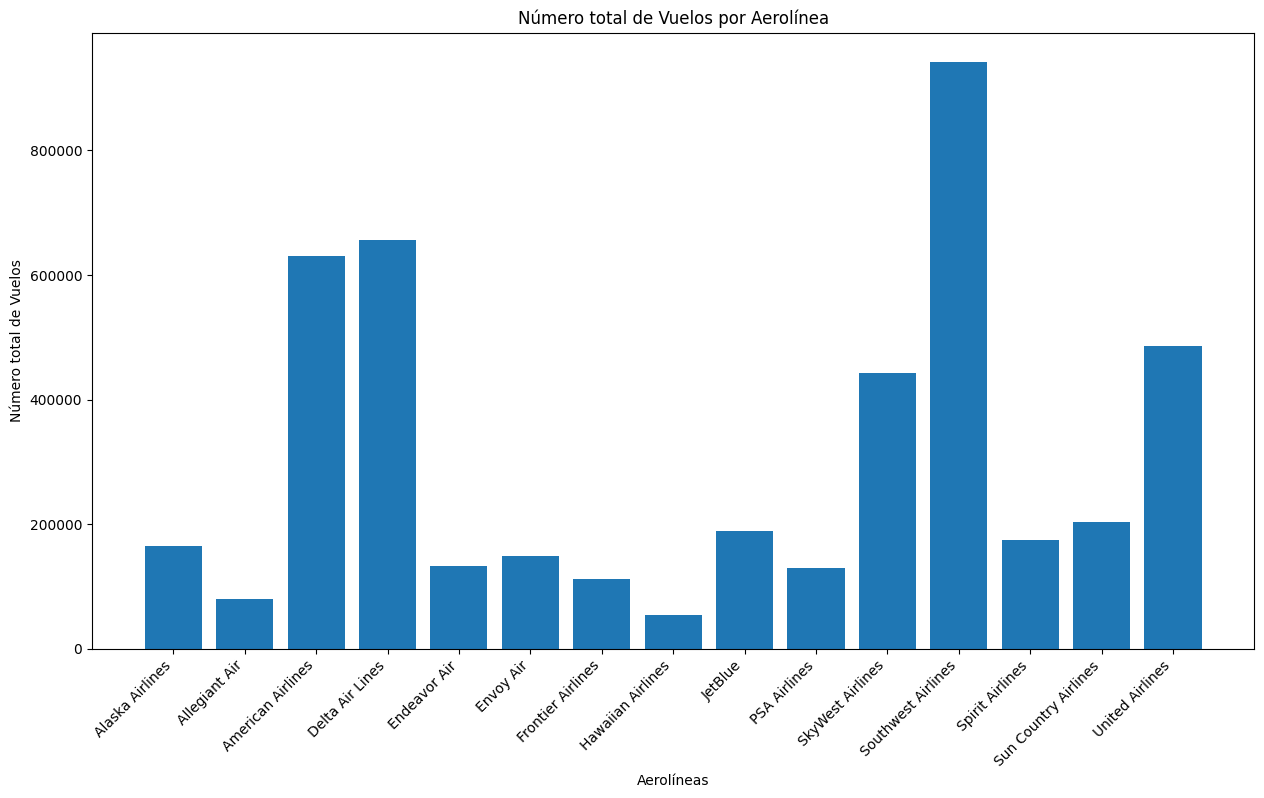

In [22]:
plt.figure(figsize=(15, 8))

plt.bar(numero_vuelos_por_aerolinea.index, numero_vuelos_por_aerolinea.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número total de Vuelos')
plt.xlabel('Aerolíneas')
plt.title('Número total de Vuelos por Aerolínea')

plt.show()

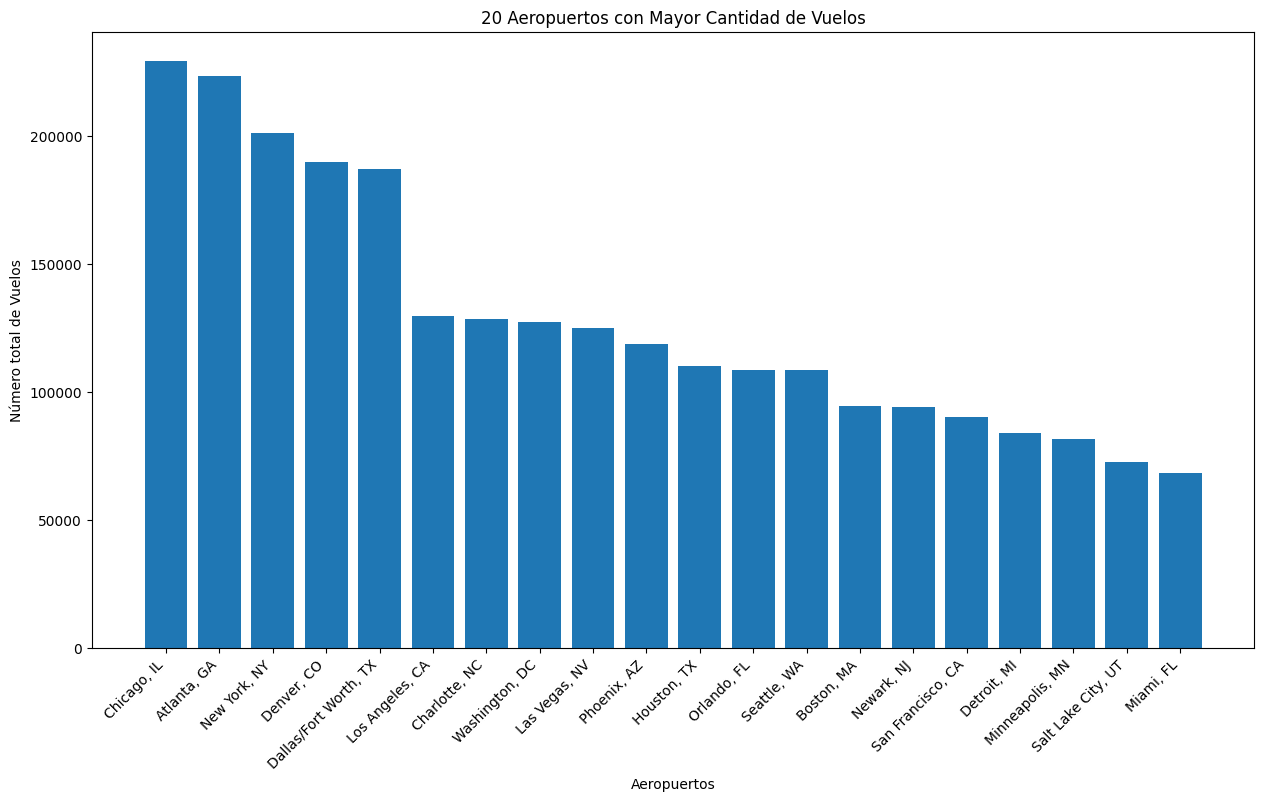

In [23]:
aeropuertos_concurridos_origen = df['ORIGIN_CITY'].value_counts().nlargest(20)

plt.figure(figsize=(15, 8))
plt.bar(aeropuertos_concurridos_origen.index, aeropuertos_concurridos_origen.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número total de Vuelos')
plt.xlabel('Aeropuertos')
plt.title('20 Aeropuertos con Mayor Cantidad de Vuelos')

plt.show()

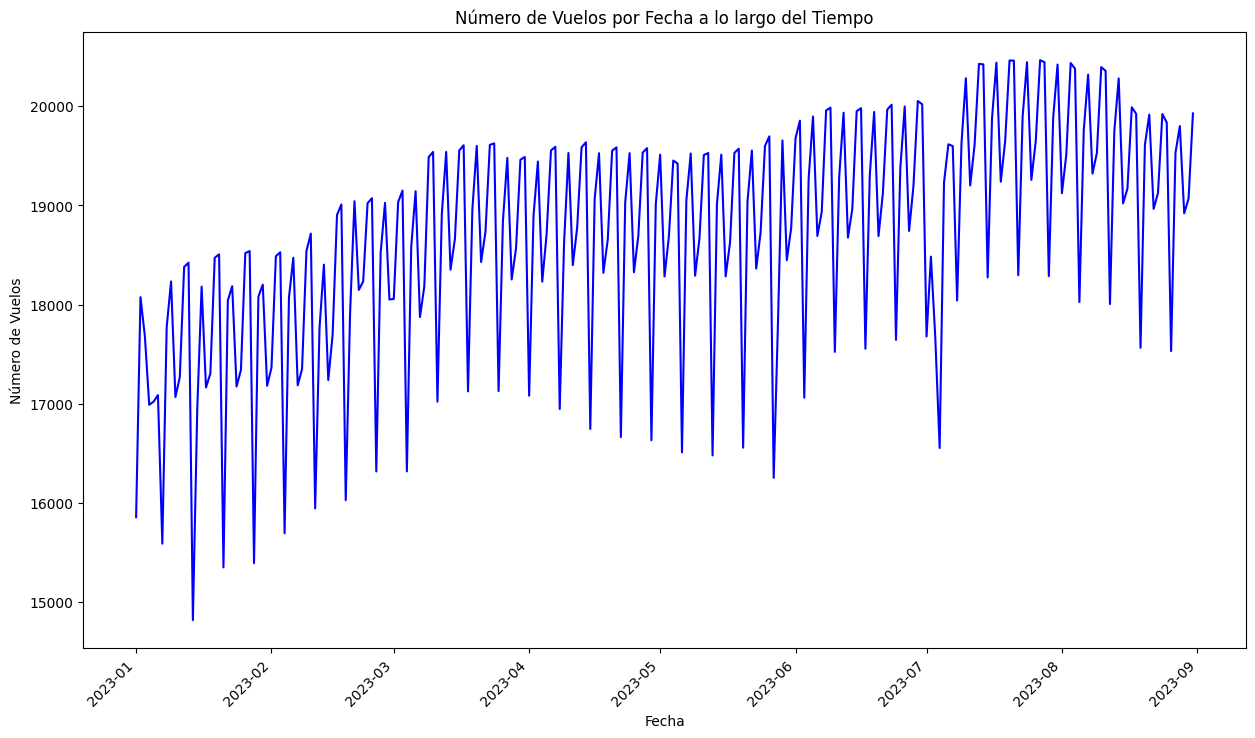

In [24]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

vuelos_por_fecha = df.groupby('FL_DATE').size()
plt.figure(figsize=(15, 8))
plt.plot(vuelos_por_fecha.index, vuelos_por_fecha.values, linestyle='-', color='b')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Vuelos')
plt.xlabel('Fecha')
plt.title('Número de Vuelos por Fecha a lo largo del Tiempo')

plt.show()

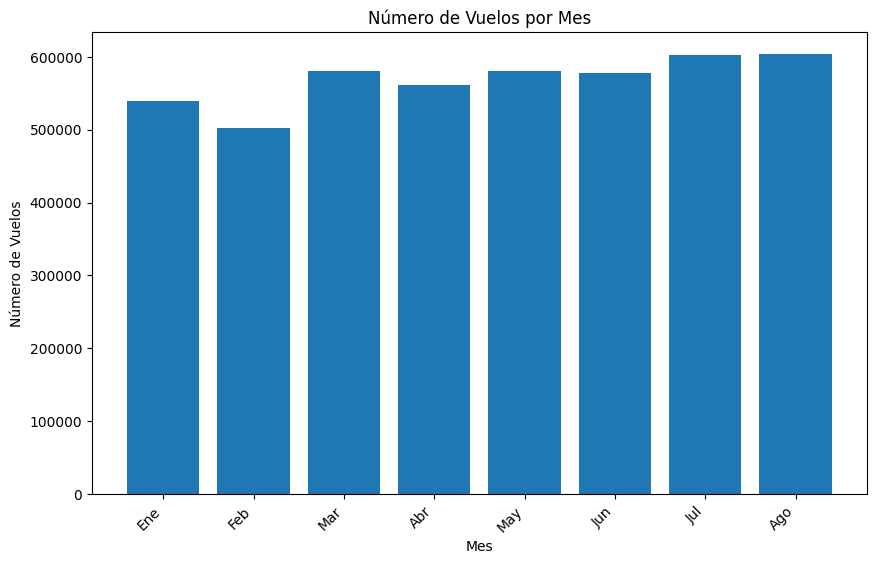

In [25]:
df['FL_MONTH'] = pd.to_datetime(df['FL_MONTH'], format='%m')

vuelos_por_mes = df['FL_MONTH'].dt.month.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(vuelos_por_mes.index, vuelos_por_mes.values)
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago']
plt.xticks(vuelos_por_mes.index, meses, rotation=45, ha='right')
plt.ylabel('Número de Vuelos')
plt.xlabel('Mes')
plt.title('Número de Vuelos por Mes')

plt.show()

#Graficos usando Seaborn

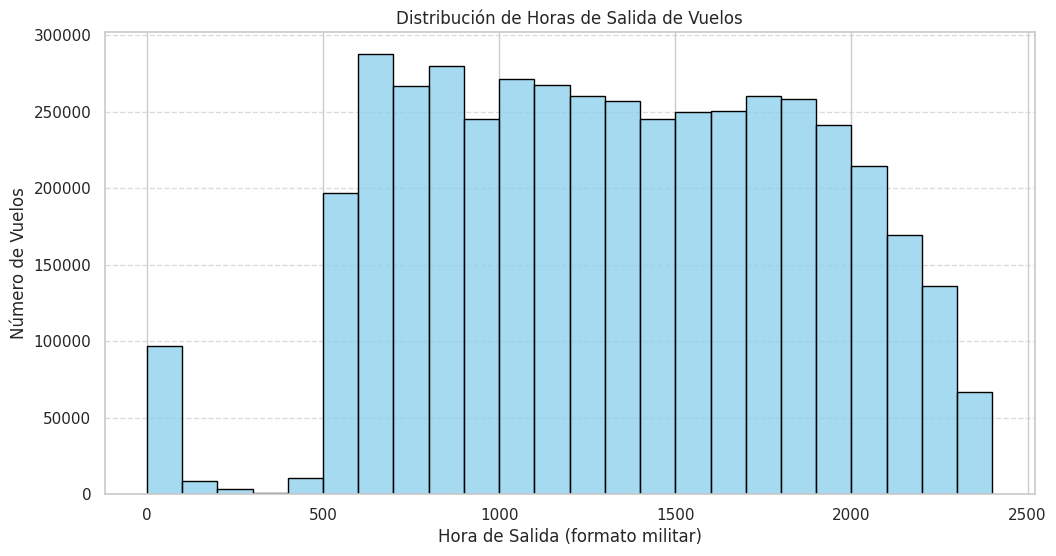

In [26]:
df = df.dropna(subset=['DEP_TIME'])

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(df['DEP_TIME'], bins=24, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Hora de Salida (formato militar)')
plt.ylabel('Número de Vuelos')
plt.title('Distribución de Horas de Salida de Vuelos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-27-e4fee650497b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FL_DAY', data=df, order=ordered_days, palette='viridis')


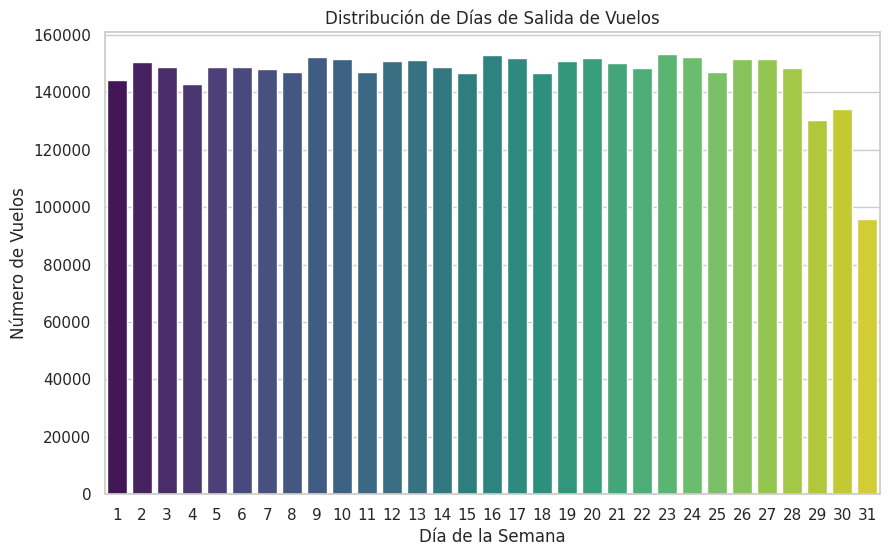

In [27]:
ordered_days = df['FL_DAY'].value_counts().index.sort_values()

plt.figure(figsize=(10, 6))
sns.countplot(x='FL_DAY', data=df, order=ordered_days, palette='viridis')

plt.xlabel('Día de la Semana')
plt.ylabel('Número de Vuelos')
plt.title('Distribución de Días de Salida de Vuelos')

plt.show()

In [28]:
datos_unicos_weekday = df['WEEKDAY'].unique()

print(datos_unicos_weekday)

[6, 3, 4, 5, 0, 1, 2]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]


<ipython-input-29-6a168fe090dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WEEKDAY', data=df, palette='viridis')


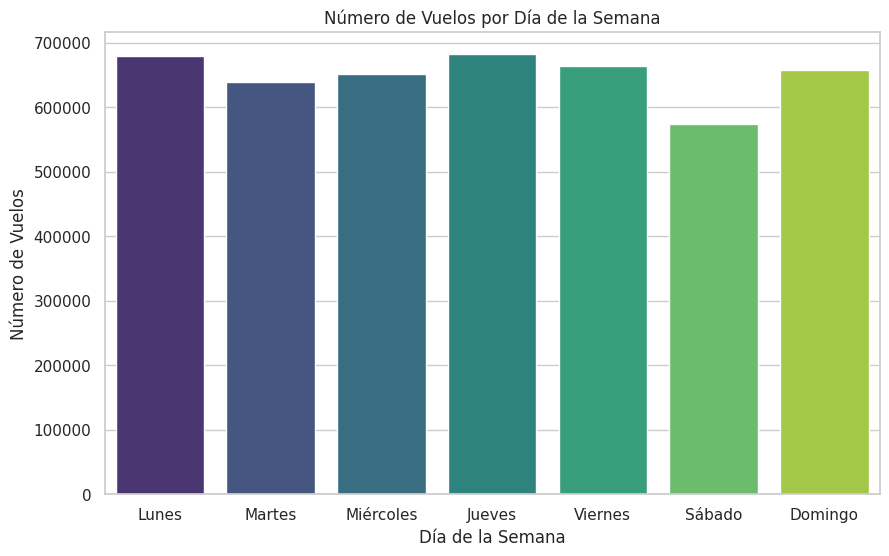

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WEEKDAY', data=df, palette='viridis')

dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.xticks(ticks=range(7), labels=dias_semana)

plt.xlabel('Día de la Semana')
plt.ylabel('Número de Vuelos')
plt.title('Número de Vuelos por Día de la Semana')

plt.show()

###Datos de aerolineas

<ipython-input-30-5ef0da81f377>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AIRLINE_NAME', y='DISTANCE', data=df, ci=None)


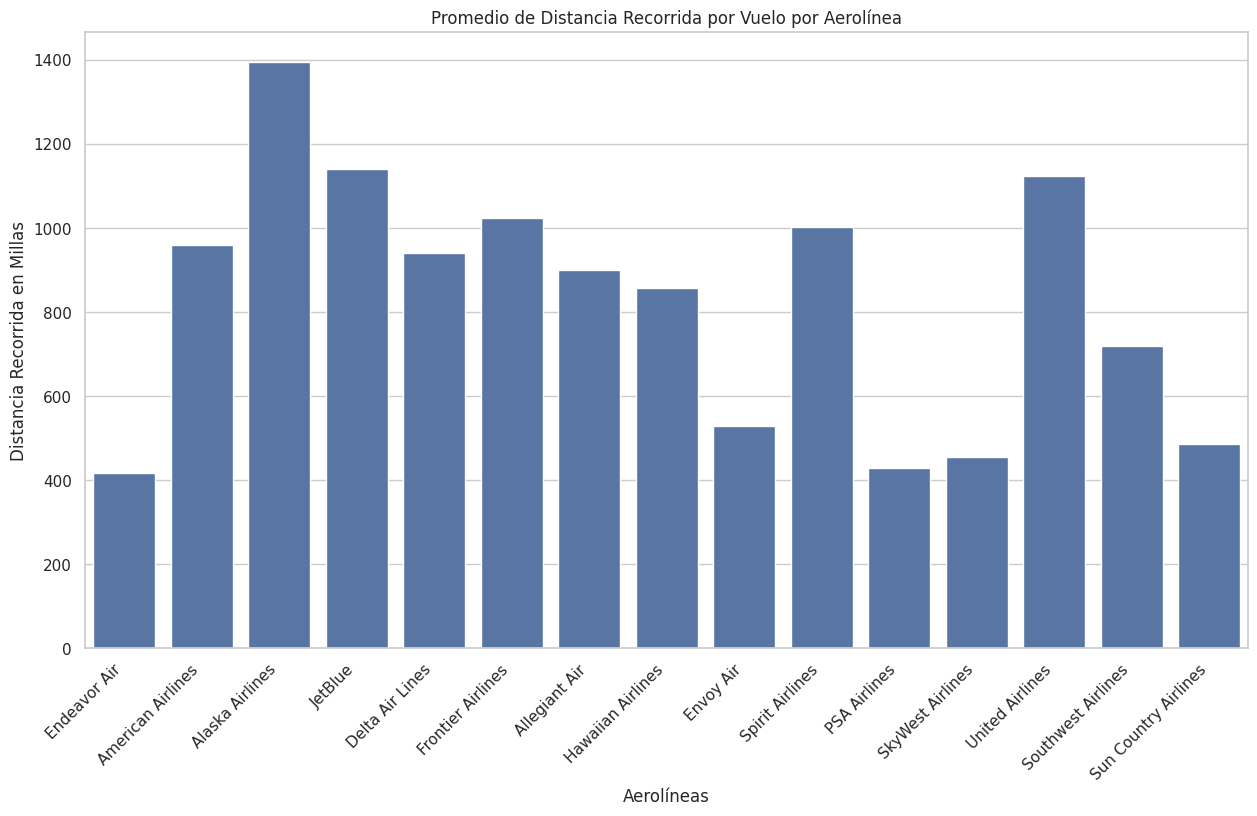

In [30]:
plt.figure(figsize=(15, 8))

sns.barplot(x='AIRLINE_NAME', y='DISTANCE', data=df, ci=None)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Distancia Recorrida en Millas')
plt.xlabel('Aerolíneas')
plt.title('Promedio de Distancia Recorrida por Vuelo por Aerolínea')

plt.show()

<ipython-input-31-8defa290e777>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AIRLINE_NAME', y='DISTANCE', data=vuelo_mas_largo_info, ci=None)


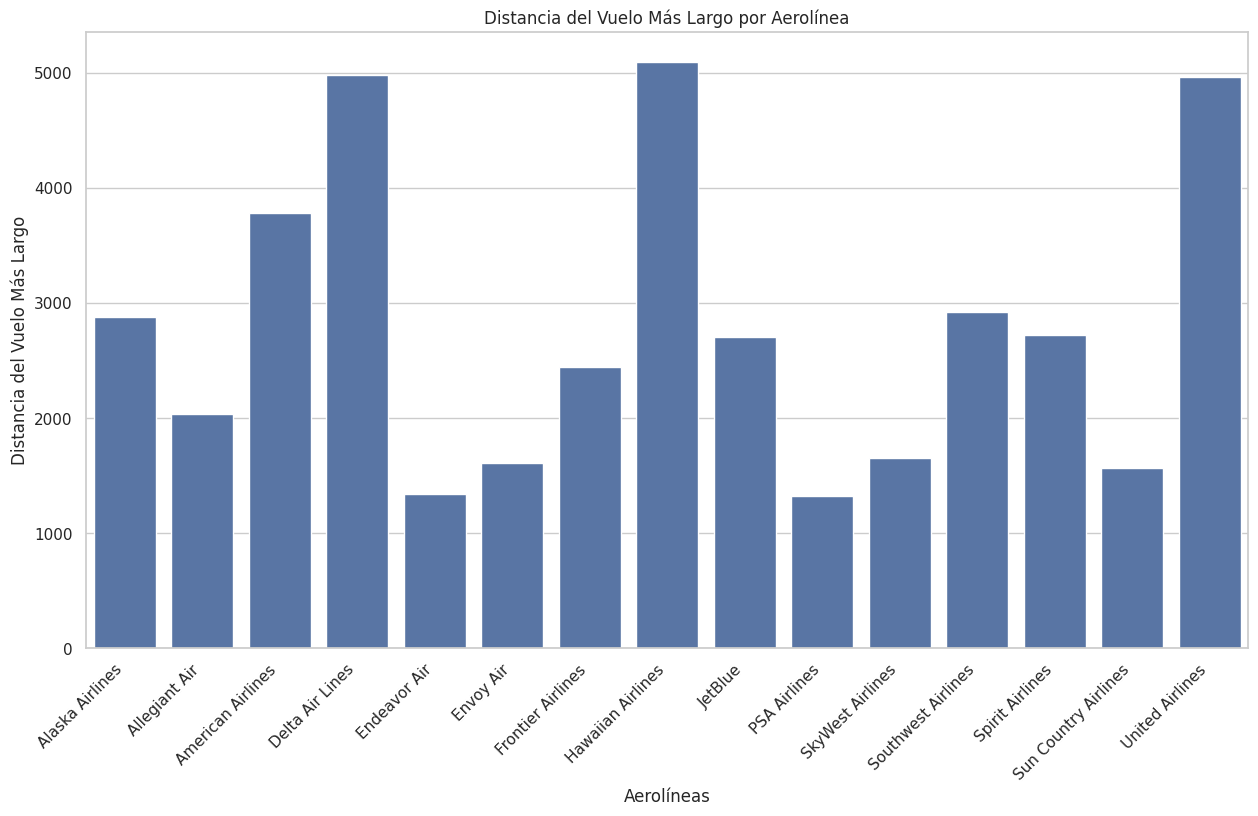

In [31]:
indice_vuelo_mas_largo = df.groupby('AIRLINE_NAME')['DISTANCE'].idxmax()

vuelo_mas_largo_info = df.loc[indice_vuelo_mas_largo, ['AIRLINE_NAME', 'FL_NUMBER', 'DISTANCE']]

plt.figure(figsize=(15, 8))
sns.barplot(x='AIRLINE_NAME', y='DISTANCE', data=vuelo_mas_largo_info, ci=None)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Distancia del Vuelo Más Largo')
plt.xlabel('Aerolíneas')
plt.title('Distancia del Vuelo Más Largo por Aerolínea')

plt.show()

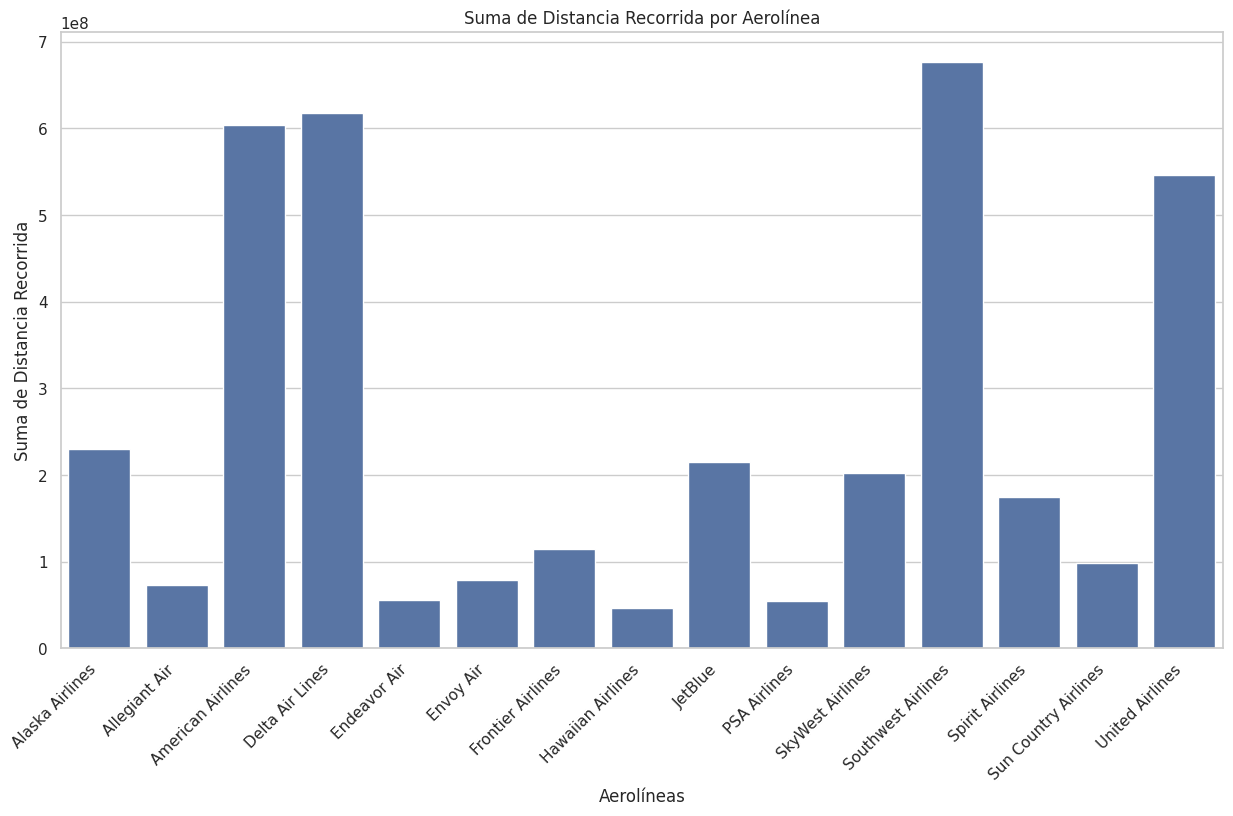

In [32]:
plt.figure(figsize=(15, 8))

suma_distancia_por_aerolinea = df.groupby('AIRLINE_NAME')['DISTANCE'].sum()
sns.barplot(x=suma_distancia_por_aerolinea.index, y=suma_distancia_por_aerolinea.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Suma de Distancia Recorrida')
plt.xlabel('Aerolíneas')
plt.title('Suma de Distancia Recorrida por Aerolínea')

plt.show()

<ipython-input-33-2e59c2fe5003>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='AIRLINE_NAME', y='DEP_DELAY', data=df_retraso_mayor_a_1, estimator='count', ci=None)
<ipython-input-33-2e59c2fe5003>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


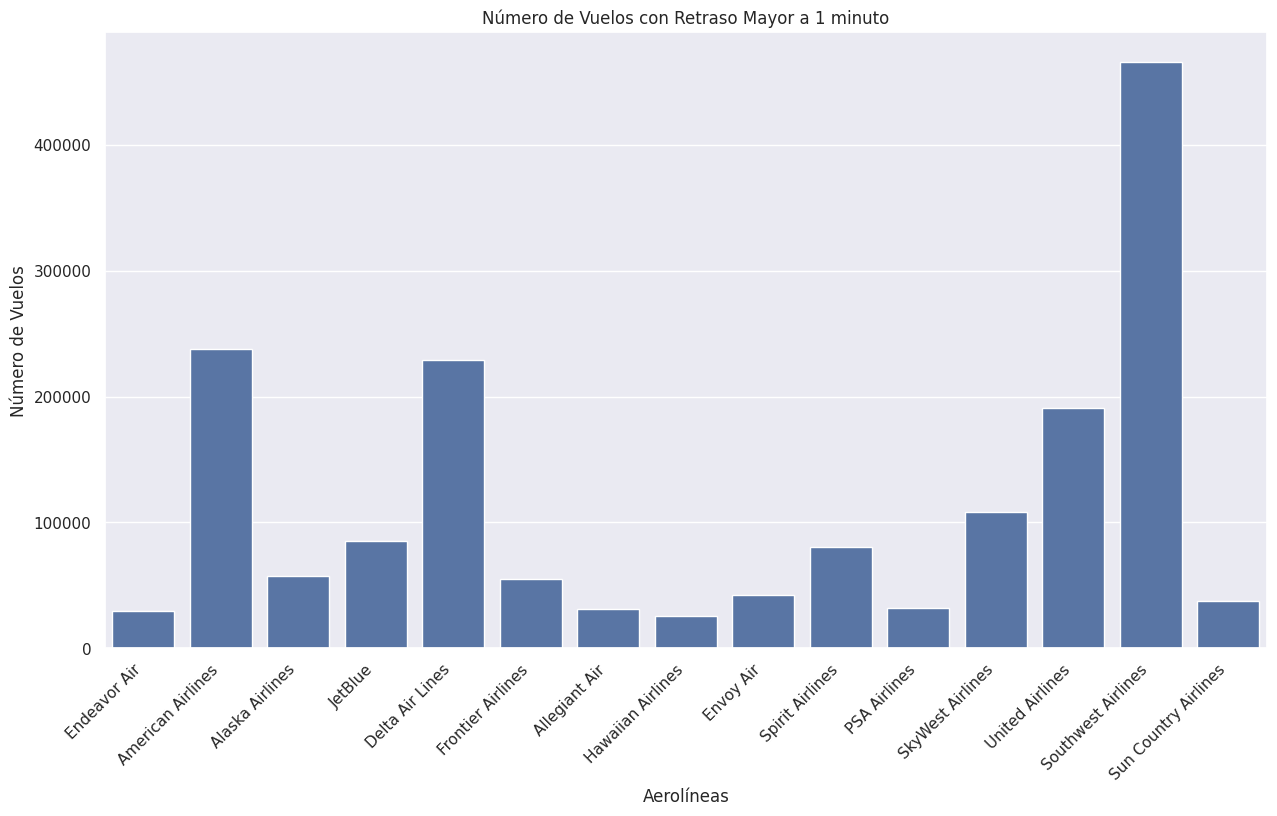

In [33]:
df_retraso_mayor_a_1 = df[df['DEP_DELAY'] > 1]

sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.barplot(x='AIRLINE_NAME', y='DEP_DELAY', data=df_retraso_mayor_a_1, estimator='count', ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set(ylabel='Número de Vuelos', xlabel='Aerolíneas')
plt.title('Número de Vuelos con Retraso Mayor a 1 minuto')

plt.show()

<ipython-input-34-cf90ff3faba3>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='AIRLINE_NAME', y='DEP_DELAY', data=df_retraso_mayor_a_1, estimator='count', ci=None)
<ipython-input-34-cf90ff3faba3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


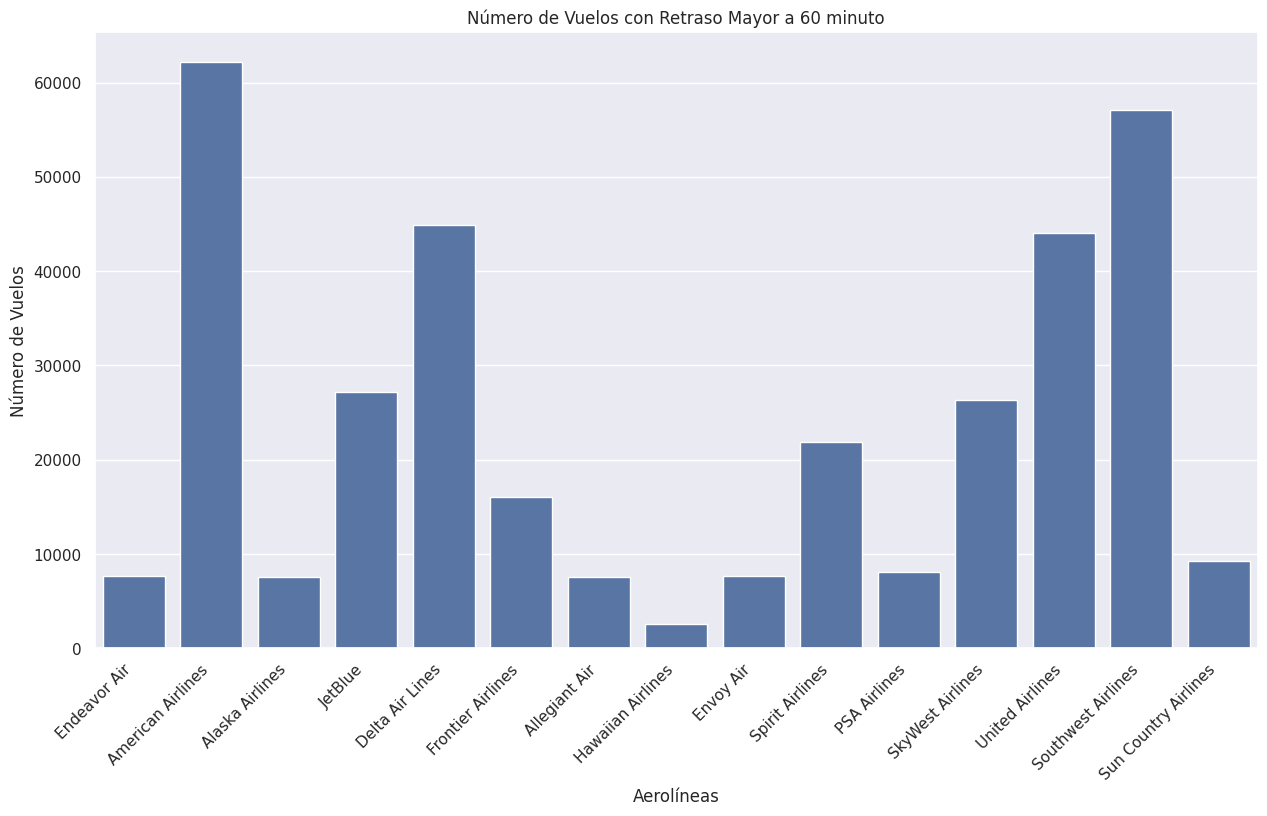

In [34]:
df_retraso_mayor_a_1 = df[df['DEP_DELAY'] > 60]

sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.barplot(x='AIRLINE_NAME', y='DEP_DELAY', data=df_retraso_mayor_a_1, estimator='count', ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set(ylabel='Número de Vuelos', xlabel='Aerolíneas')
plt.title('Número de Vuelos con Retraso Mayor a 60 minuto')

plt.show()

<ipython-input-35-b72365c40b21>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='AIRLINE_NAME', y='DEP_DELAY', data=df_retraso_mayor_a_1, estimator='count', ci=None)
<ipython-input-35-b72365c40b21>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


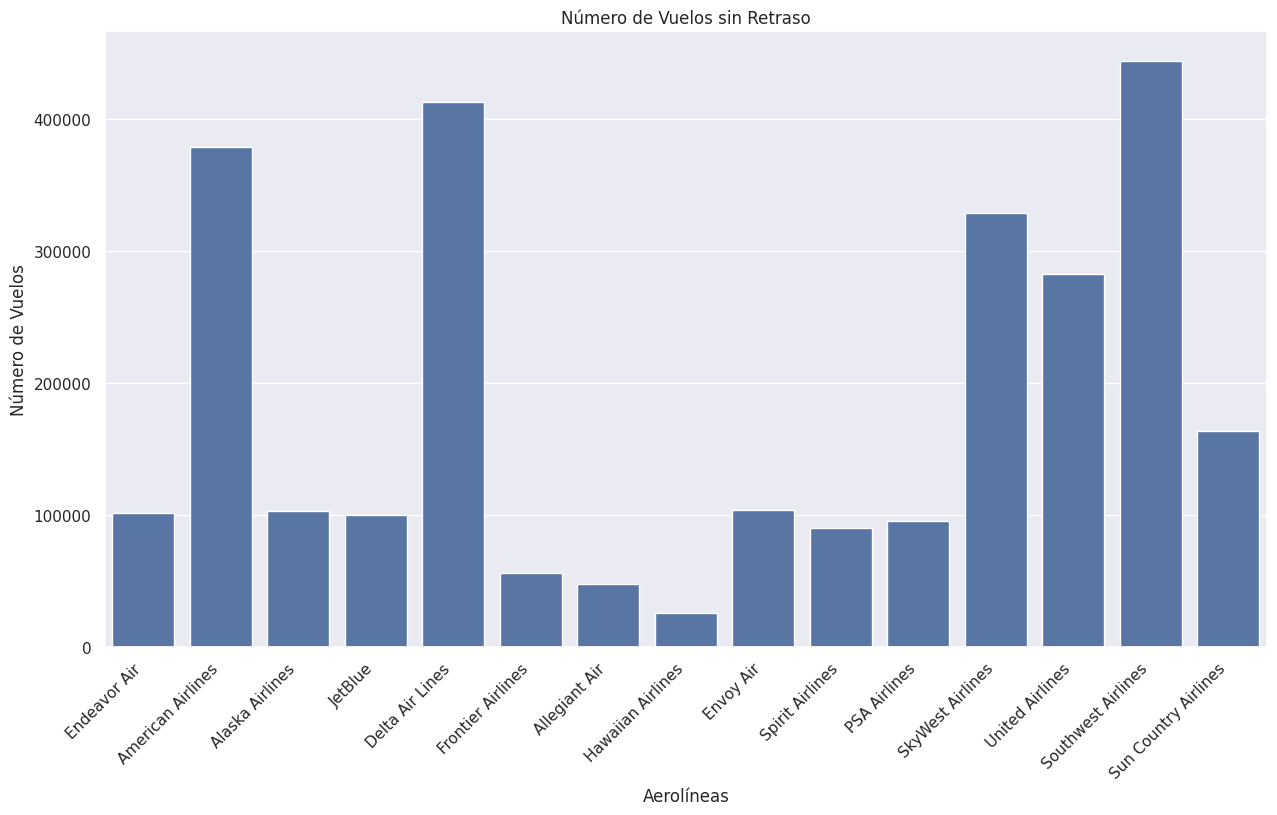

In [35]:
df_retraso_mayor_a_1 = df[df['DEP_DELAY'] <= 0]

sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.barplot(x='AIRLINE_NAME', y='DEP_DELAY', data=df_retraso_mayor_a_1, estimator='count', ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set(ylabel='Número de Vuelos', xlabel='Aerolíneas')
plt.title('Número de Vuelos sin Retraso')

plt.show()

###¿Hay diferencias significativas en el rendimiento entre diferentes aerolíneas?

<ipython-input-36-09b42210d3aa>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='AIRLINE_NAME', y='Total_Vuelos', data=suma_vuelos_por_aerolinea, ci=None, color='green')


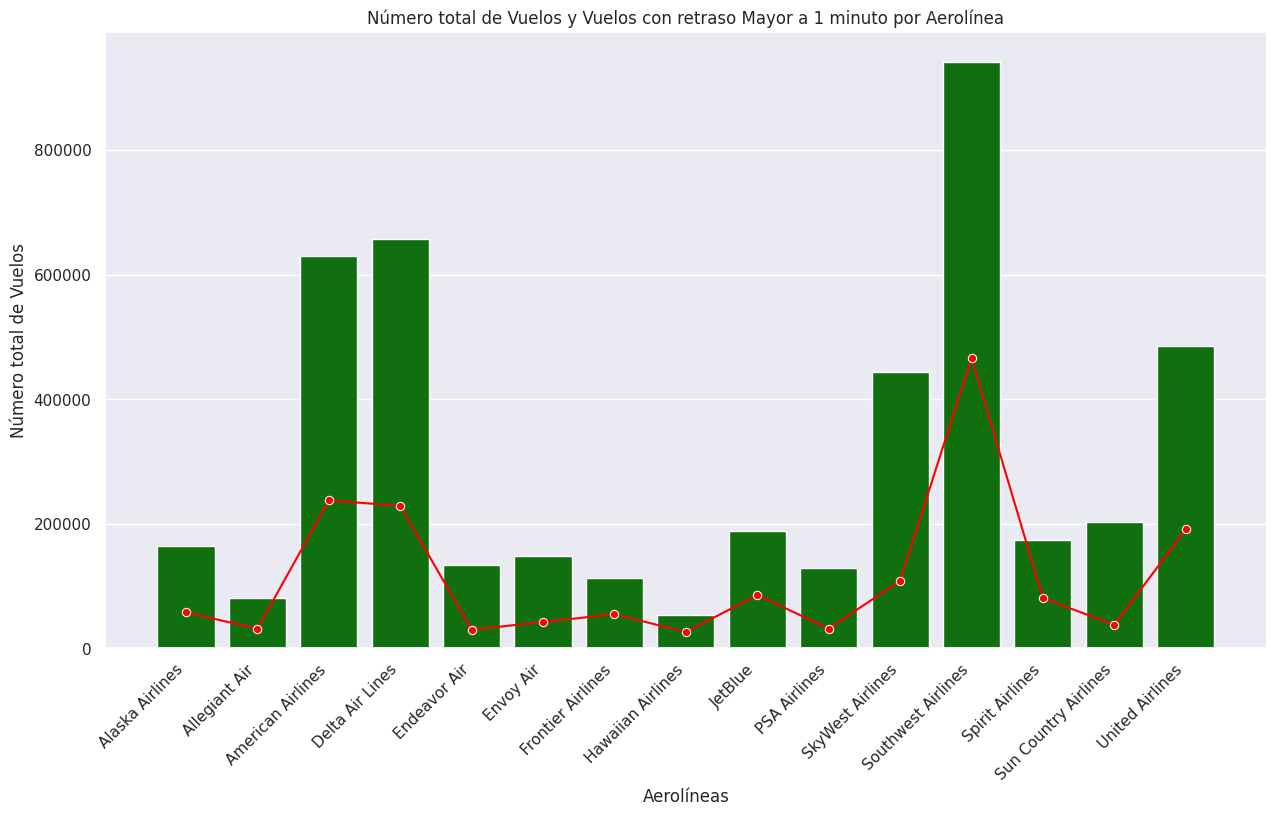

In [36]:
suma_vuelos_por_aerolinea = df.groupby('AIRLINE_NAME').size().reset_index(name='Total_Vuelos')

suma_retrasos_por_aerolinea = df[df['DEP_DELAY'] > 1].groupby('AIRLINE_NAME').size().reset_index(name='Vuelos_con_Retraso')

plt.figure(figsize=(15, 8))

ax = sns.barplot(x='AIRLINE_NAME', y='Total_Vuelos', data=suma_vuelos_por_aerolinea, ci=None, color='green')

sns.lineplot(x='AIRLINE_NAME', y='Vuelos_con_Retraso', data=suma_retrasos_por_aerolinea, color='red', marker='o')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Número total de Vuelos')
plt.xlabel('Aerolíneas')
plt.title('Número total de Vuelos y Vuelos con retraso Mayor a 1 minuto por Aerolínea')

plt.show()

<ipython-input-37-4e8f4d005d7d>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='AIRLINE_NAME', y='Total_Vuelos', data=suma_vuelos_por_aerolinea, ci=None, color='green')


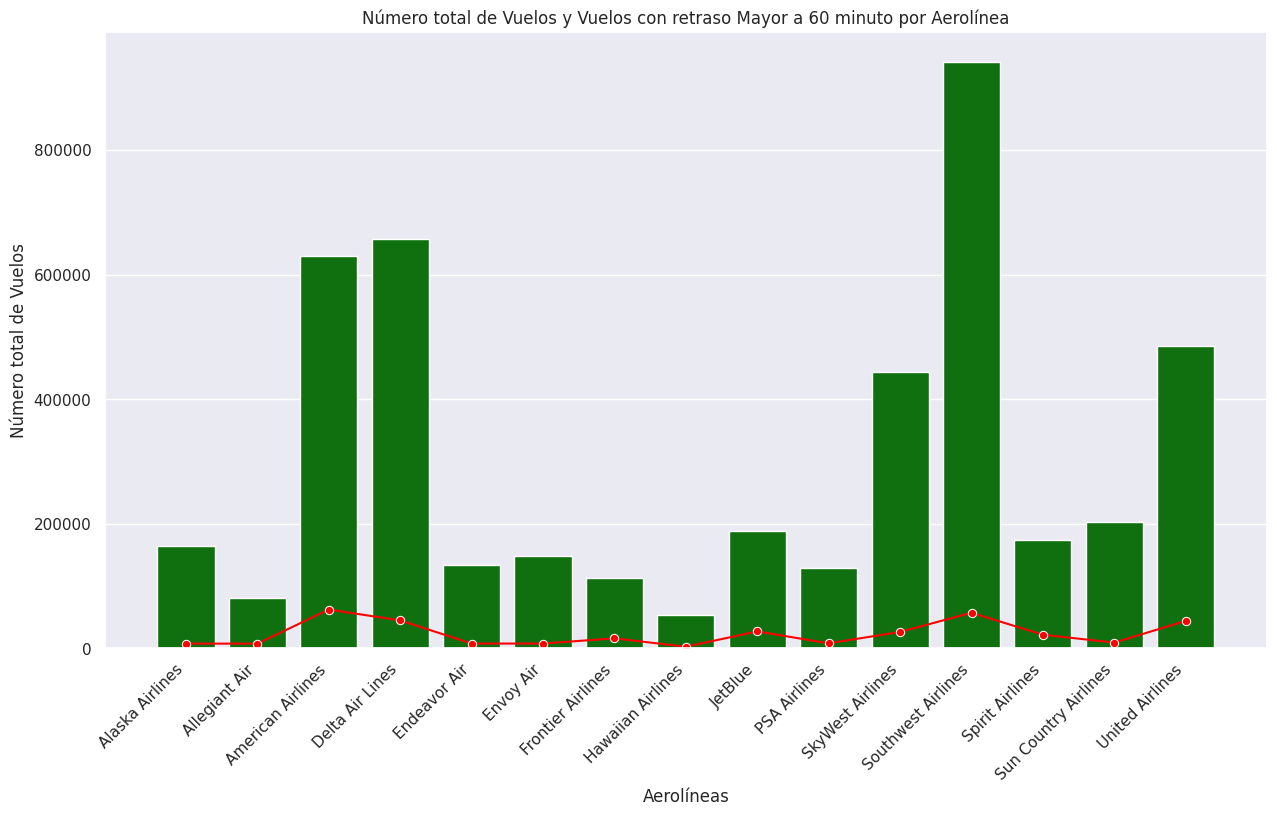

In [37]:
suma_vuelos_por_aerolinea = df.groupby('AIRLINE_NAME').size().reset_index(name='Total_Vuelos')

suma_retrasos_por_aerolinea = df[df['DEP_DELAY'] > 60].groupby('AIRLINE_NAME').size().reset_index(name='Vuelos_con_Retraso')

plt.figure(figsize=(15, 8))

ax = sns.barplot(x='AIRLINE_NAME', y='Total_Vuelos', data=suma_vuelos_por_aerolinea, ci=None, color='green')

sns.lineplot(x='AIRLINE_NAME', y='Vuelos_con_Retraso', data=suma_retrasos_por_aerolinea, color='red', marker='o')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Número total de Vuelos')
plt.xlabel('Aerolíneas')
plt.title('Número total de Vuelos y Vuelos con retraso Mayor a 60 minuto por Aerolínea')

plt.show()

<ipython-input-38-bab04e6d9912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AIRLINE_NAME', y='Porcentaje_Retrasos', data=df_porcentajes, ci=None, color='red')


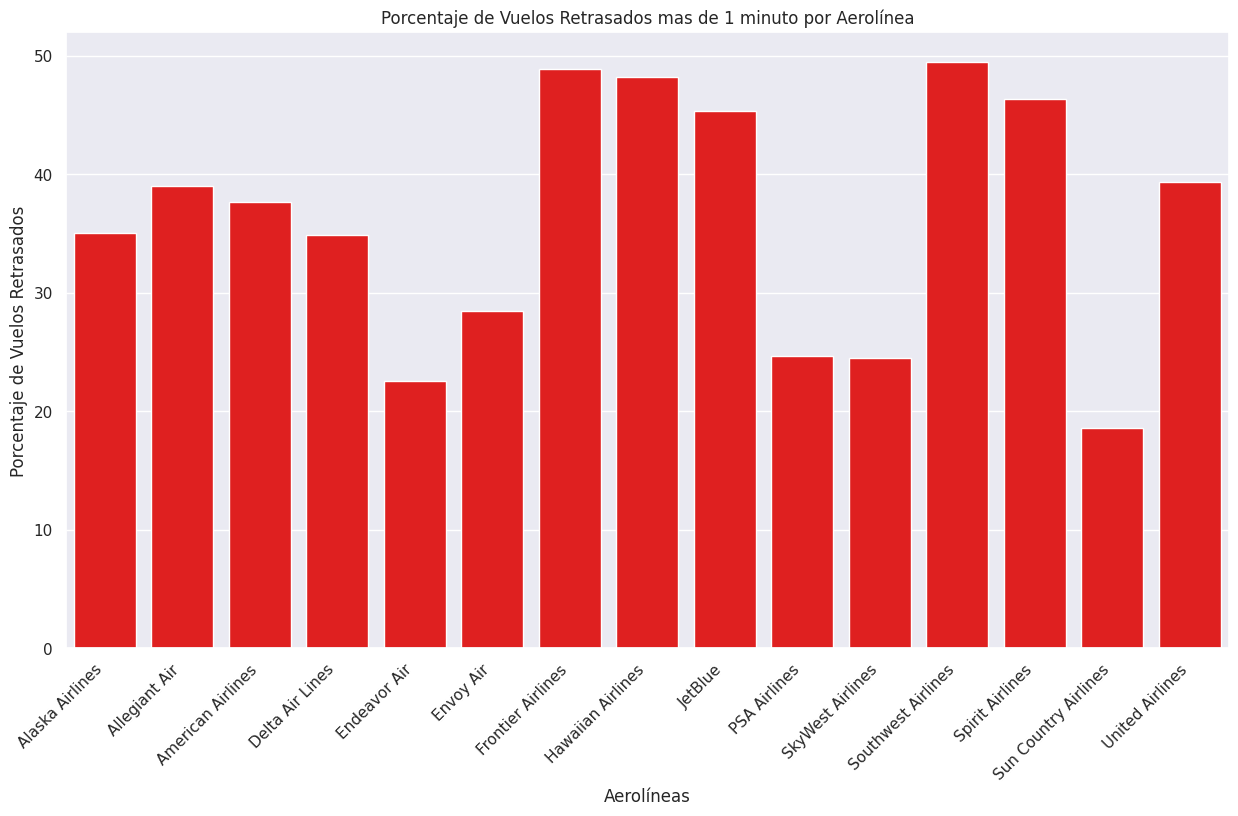

In [38]:
suma_vuelos_por_aerolinea = df.groupby('AIRLINE_NAME').size().reset_index(name='Total_Vuelos')

suma_retrasos_por_aerolinea = df[df['DEP_DELAY'] > 1].groupby('AIRLINE_NAME').size().reset_index(name='Vuelos_con_Retraso')

df_porcentajes = pd.merge(suma_vuelos_por_aerolinea, suma_retrasos_por_aerolinea, on='AIRLINE_NAME', how='left')

df_porcentajes['Porcentaje_Retrasos'] = (df_porcentajes['Vuelos_con_Retraso'] / df_porcentajes['Total_Vuelos']) * 100

plt.figure(figsize=(15, 8))
sns.barplot(x='AIRLINE_NAME', y='Porcentaje_Retrasos', data=df_porcentajes, ci=None, color='red')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Porcentaje de Vuelos Retrasados')
plt.xlabel('Aerolíneas')
plt.title('Porcentaje de Vuelos Retrasados mas de 1 minuto por Aerolínea')

plt.show()

<ipython-input-39-e8df5120acfb>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AIRLINE_NAME', y='Porcentaje_Retrasos', data=df_porcentajes, ci=None, color='red')


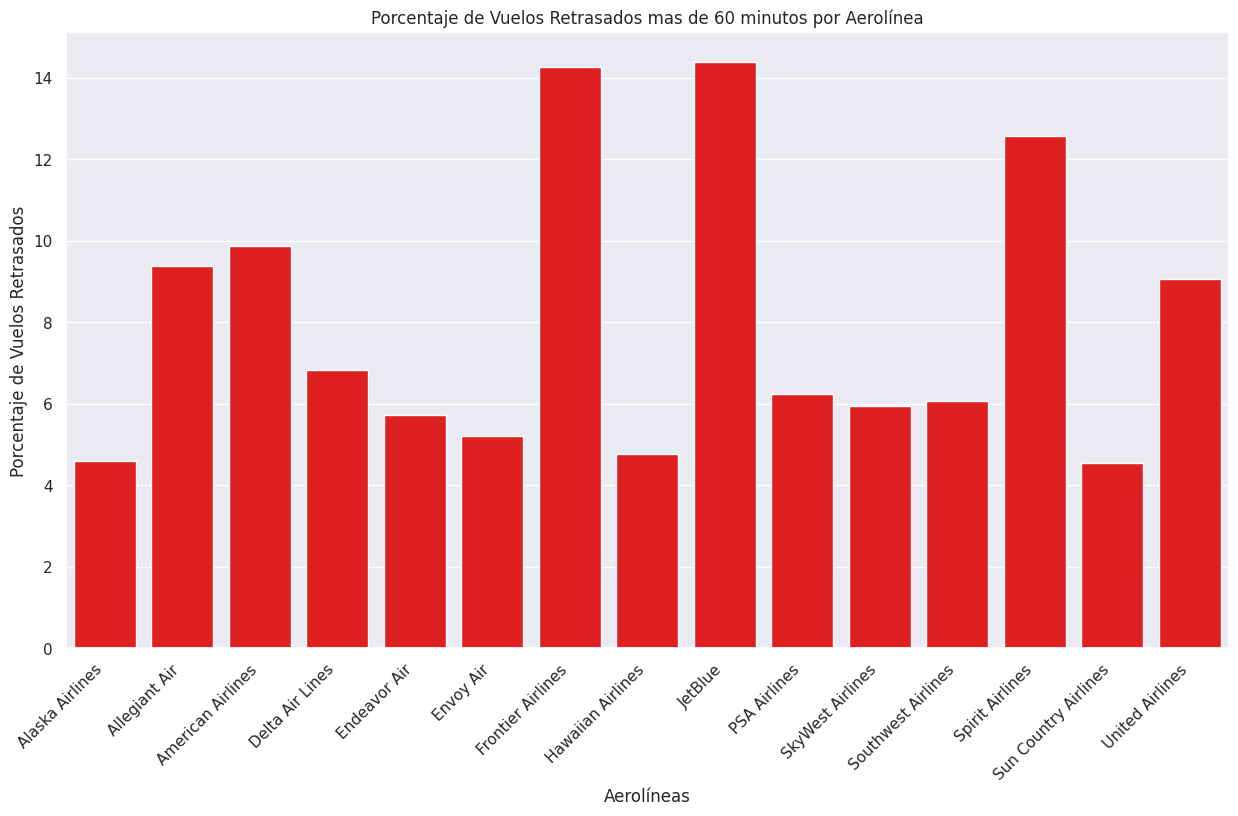

In [39]:
suma_vuelos_por_aerolinea = df.groupby('AIRLINE_NAME').size().reset_index(name='Total_Vuelos')

suma_retrasos_por_aerolinea = df[df['DEP_DELAY'] > 60].groupby('AIRLINE_NAME').size().reset_index(name='Vuelos_con_Retraso')

df_porcentajes = pd.merge(suma_vuelos_por_aerolinea, suma_retrasos_por_aerolinea, on='AIRLINE_NAME', how='left')

df_porcentajes['Porcentaje_Retrasos'] = (df_porcentajes['Vuelos_con_Retraso'] / df_porcentajes['Total_Vuelos']) * 100

plt.figure(figsize=(15, 8))
sns.barplot(x='AIRLINE_NAME', y='Porcentaje_Retrasos', data=df_porcentajes, ci=None, color='red')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Porcentaje de Vuelos Retrasados')
plt.xlabel('Aerolíneas')
plt.title('Porcentaje de Vuelos Retrasados mas de 60 minutos por Aerolínea')

plt.show()

<ipython-input-40-845a1f505d2e>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AIRLINE_NAME', y='Total_Horas_Retraso', data=total_horas_retraso_por_aerolinea, ci=None, color='purple')


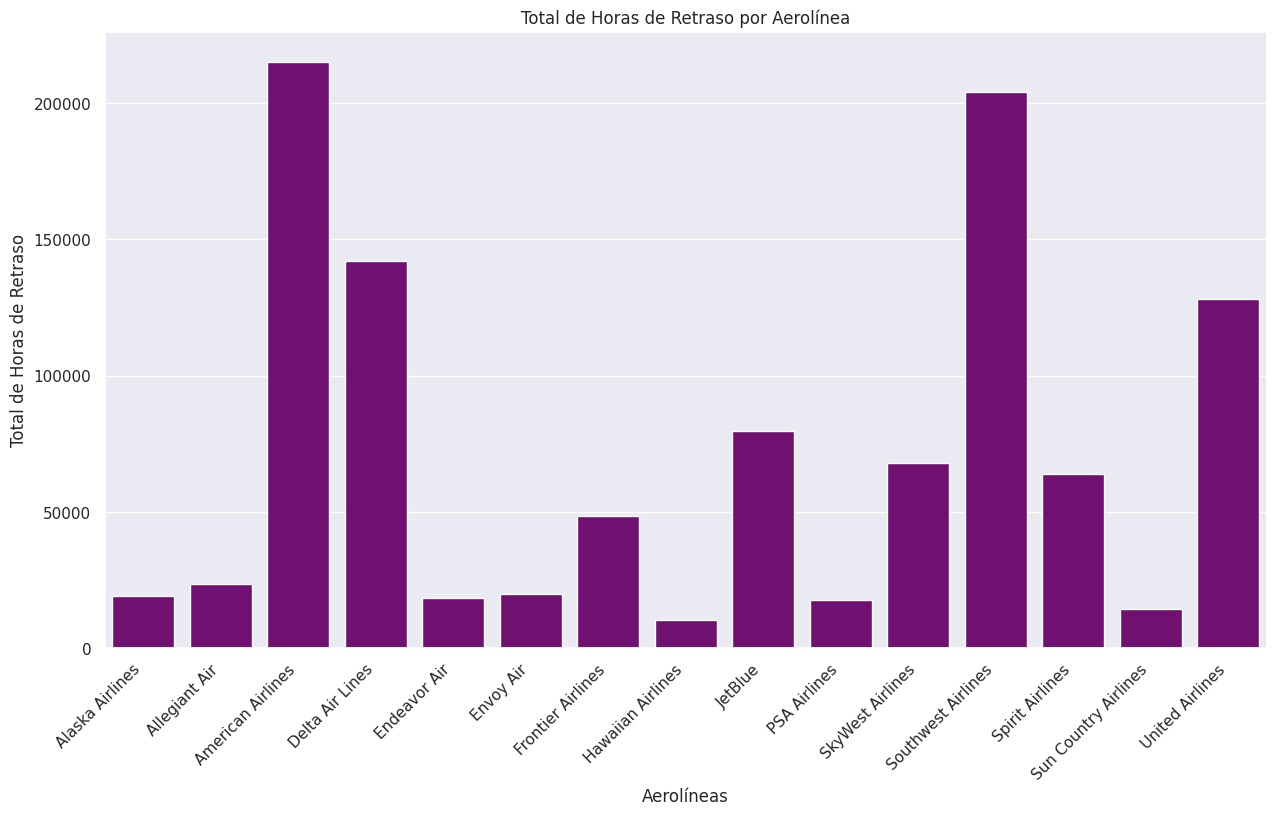

In [40]:
df['DELAY_DURATION'] = df['DEP_DELAY'] / 60.0

total_horas_retraso_por_aerolinea = df.groupby('AIRLINE_NAME')['DELAY_DURATION'].sum().reset_index(name='Total_Horas_Retraso')

plt.figure(figsize=(15, 8))
sns.barplot(x='AIRLINE_NAME', y='Total_Horas_Retraso', data=total_horas_retraso_por_aerolinea, ci=None, color='purple')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total de Horas de Retraso')
plt.xlabel('Aerolíneas')
plt.title('Total de Horas de Retraso por Aerolínea')

plt.show()

###Tabla porcentual de retraso por aerolinea

In [41]:
from tabulate import tabulate

df['DELAY_DURATION'] = df['DEP_DELAY'] / 60.0

delay_hours = [-0.5, -0.25, 0, 0.25, 0.5, 1, 3, 6, 12, 24]

df['Delay_Category'] = pd.cut(df['DELAY_DURATION'], delay_hours)

distribucion_por_aerolinea = (
    pd.pivot_table(df, values='DELAY_DURATION', index='AIRLINE_NAME', columns='Delay_Category', aggfunc='count', fill_value=0)
    .apply(lambda x: (x / x.sum()) * 100, axis=1)
    .round(1)
    .astype(str) + ' %'
)

tabla = tabulate(distribucion_por_aerolinea, headers='keys', tablefmt='pretty')

print(tabla)

+----------------------+---------------+--------------+-------------+-------------+------------+------------+------------+-------------+--------------+
|     AIRLINE_NAME     | (-0.5, -0.25] | (-0.25, 0.0] | (0.0, 0.25] | (0.25, 0.5] | (0.5, 1.0] | (1.0, 3.0] | (3.0, 6.0] | (6.0, 12.0] | (12.0, 24.0] |
+----------------------+---------------+--------------+-------------+-------------+------------+------------+------------+-------------+--------------+
|   Alaska Airlines    |     3.5 %     |    59.1 %    |   19.4 %    |    7.6 %    |   5.8 %    |   3.9 %    |   0.6 %    |    0.1 %    |    0.0 %     |
|    Allegiant Air     |     7.5 %     |    52.0 %    |   15.8 %    |    7.9 %    |   7.4 %    |   7.3 %    |   1.5 %    |    0.2 %    |    0.3 %     |
|  American Airlines   |     0.2 %     |    59.9 %    |   16.1 %    |    6.9 %    |   7.0 %    |   7.5 %    |   1.5 %    |    0.5 %    |    0.3 %     |
|   Delta Air Lines    |     0.5 %     |    62.3 %    |   17.8 %    |    6.6 %    |   5.

###Tabla porcentual de cancelaciones por aerolinea

In [42]:
total_vuelos_por_aerolinea = df.groupby('AIRLINE_NAME').size().reset_index(name='Total_Vuelos')

vuelos_cancelados_por_aerolinea = df[df['CANCELLED'] == 1].groupby('AIRLINE_NAME').size().reset_index(name='Vuelos_Cancelados')

datos_por_aerolinea = pd.merge(total_vuelos_por_aerolinea, vuelos_cancelados_por_aerolinea, on='AIRLINE_NAME', how='left')

datos_por_aerolinea['Porcentaje_Cancelados'] = round((datos_por_aerolinea['Vuelos_Cancelados'] / datos_por_aerolinea['Total_Vuelos']) * 100, 2)

tabla_presentable = tabulate(datos_por_aerolinea, headers='keys', tablefmt='pretty')

print(tabla_presentable)

+----+----------------------+--------------+-------------------+-----------------------+
|    |     AIRLINE_NAME     | Total_Vuelos | Vuelos_Cancelados | Porcentaje_Cancelados |
+----+----------------------+--------------+-------------------+-----------------------+
| 0  |   Alaska Airlines    |    164957    |       1628        |         0.99          |
| 1  |    Allegiant Air     |    80584     |        675        |         0.84          |
| 2  |  American Airlines   |    630400    |       8857        |          1.4          |
| 3  |   Delta Air Lines    |    656543    |       9508        |         1.45          |
| 4  |     Endeavor Air     |    133138    |       3309        |         2.49          |
| 5  |      Envoy Air       |    148296    |       1946        |         1.31          |
| 6  |  Frontier Airlines   |    112317    |       3221        |         2.87          |
| 7  |  Hawaiian Airlines   |    54011     |        705        |         1.31          |
| 8  |       JetBlue 

###Tabla porcentual de desvios por aerolinea

In [43]:
total_vuelos_por_aerolinea = df.groupby('AIRLINE_NAME').size().reset_index(name='Total_Vuelos')

vuelos_cancelados_por_aerolinea = df[df['DIVERTED'] == 1].groupby('AIRLINE_NAME').size().reset_index(name='Vuelos_Desviados')

datos_por_aerolinea = pd.merge(total_vuelos_por_aerolinea, vuelos_cancelados_por_aerolinea, on='AIRLINE_NAME', how='left')

datos_por_aerolinea['Porcentaje_Desviados'] = round((datos_por_aerolinea['Vuelos_Desviados'] / datos_por_aerolinea['Total_Vuelos']) * 100, 2)

tabla_presentable = tabulate(datos_por_aerolinea, headers='keys', tablefmt='pretty')

print(tabla_presentable)

+----+----------------------+--------------+------------------+----------------------+
|    |     AIRLINE_NAME     | Total_Vuelos | Vuelos_Desviados | Porcentaje_Desviados |
+----+----------------------+--------------+------------------+----------------------+
| 0  |   Alaska Airlines    |    164957    |       515        |         0.31         |
| 1  |    Allegiant Air     |    80584     |       248        |         0.31         |
| 2  |  American Airlines   |    630400    |       1900       |         0.3          |
| 3  |   Delta Air Lines    |    656543    |       1614       |         0.25         |
| 4  |     Endeavor Air     |    133138    |       282        |         0.21         |
| 5  |      Envoy Air       |    148296    |       365        |         0.25         |
| 6  |  Frontier Airlines   |    112317    |       224        |         0.2          |
| 7  |  Hawaiian Airlines   |    54011     |        53        |         0.1          |
| 8  |       JetBlue        |    188695    

In [44]:
vuelos_con_retraso_clima = df[df['DELAY_DUE_WEATHER'] > 1]
cantidad_vuelos_retraso_clima = len(vuelos_con_retraso_clima)

print(f'Cantidad de vuelos con retraso debido al clima: {cantidad_vuelos_retraso_clima}')

Cantidad de vuelos con retraso debido al clima: 57164


<ipython-input-45-0a0d40968179>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AIRLINE_NAME', data=vuelos_retraso_clima, palette='Set2')


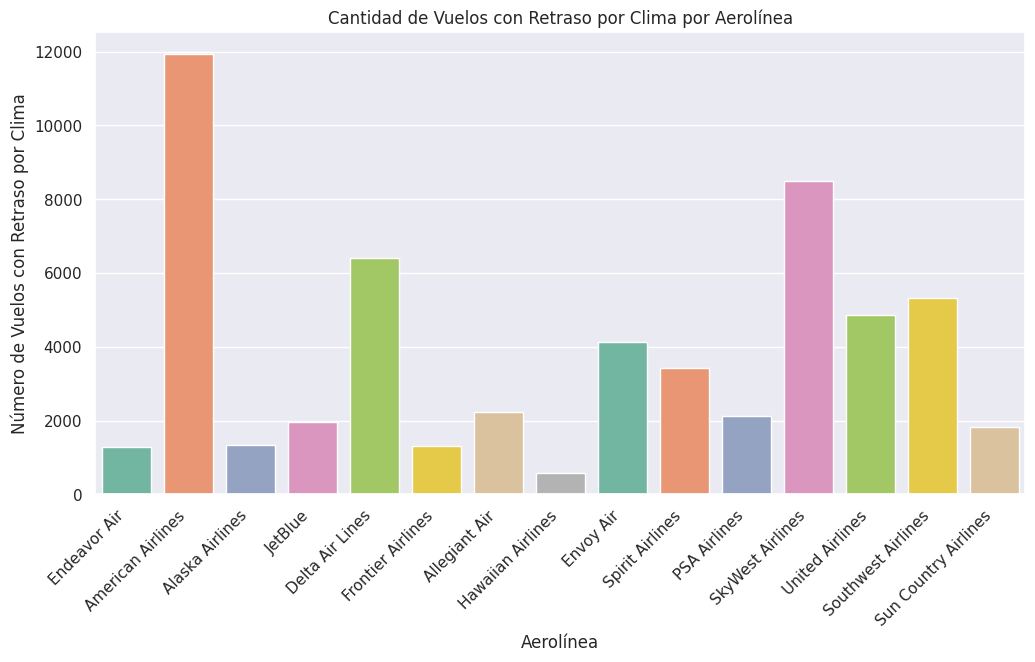

In [45]:
vuelos_retraso_clima = df[df['DELAY_DUE_WEATHER'] > 1]

plt.figure(figsize=(12, 6))
sns.countplot(x='AIRLINE_NAME', data=vuelos_retraso_clima, palette='Set2')

plt.xlabel('Aerolínea')
plt.ylabel('Número de Vuelos con Retraso por Clima')
plt.title('Cantidad de Vuelos con Retraso por Clima por Aerolínea')
plt.xticks(rotation=45, ha='right')

plt.show()

In [46]:
vuelos_con_retraso_por_linea_aerea = df[df['DELAY_DUE_CARRIER'] > 1]
vuelos_con_retraso_por_linea_aerea = len(vuelos_con_retraso_por_linea_aerea)

print(f'Cantidad de vuelos con retraso debido a Linea Aerea: {vuelos_con_retraso_por_linea_aerea}')

Cantidad de vuelos con retraso debido a Linea Aerea: 563198


<ipython-input-47-7e379aa8e1ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AIRLINE_NAME', data=vuelos_con_retraso_por_linea_aerea, palette='Set2')


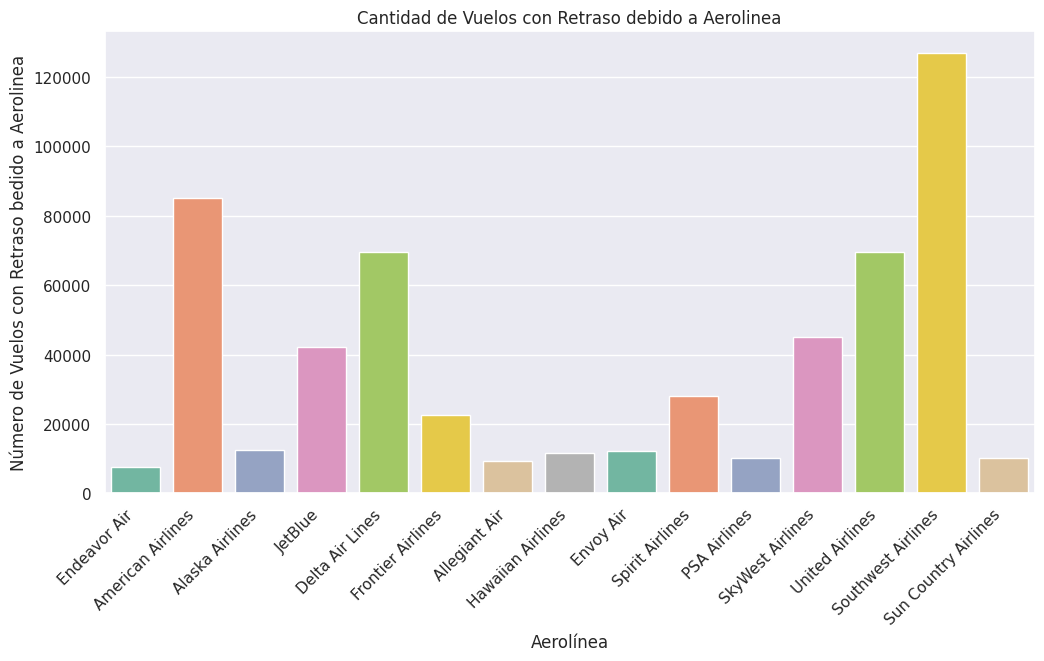

In [47]:
vuelos_con_retraso_por_linea_aerea = df[df['DELAY_DUE_CARRIER'] > 1]

plt.figure(figsize=(12, 6))
sns.countplot(x='AIRLINE_NAME', data=vuelos_con_retraso_por_linea_aerea, palette='Set2')

plt.xlabel('Aerolínea')
plt.ylabel('Número de Vuelos con Retraso bedido a Aerolinea')
plt.title('Cantidad de Vuelos con Retraso debido a Aerolinea')
plt.xticks(rotation=45, ha='right')

plt.show()

In [48]:
vuelos_con_retraso_por_nas = df[df['DELAY_DUE_NAS'] > 1]
vuelos_con_retraso_por_nas = len(vuelos_con_retraso_por_nas)

print(f'Cantidad de vuelos con retraso debido al Sistema Nacional de Aviación: {vuelos_con_retraso_por_nas}')

Cantidad de vuelos con retraso debido al Sistema Nacional de Aviación: 461941


<ipython-input-49-64077857e72f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AIRLINE_NAME', data=vuelos_con_retraso_por_nas, palette='Set2')


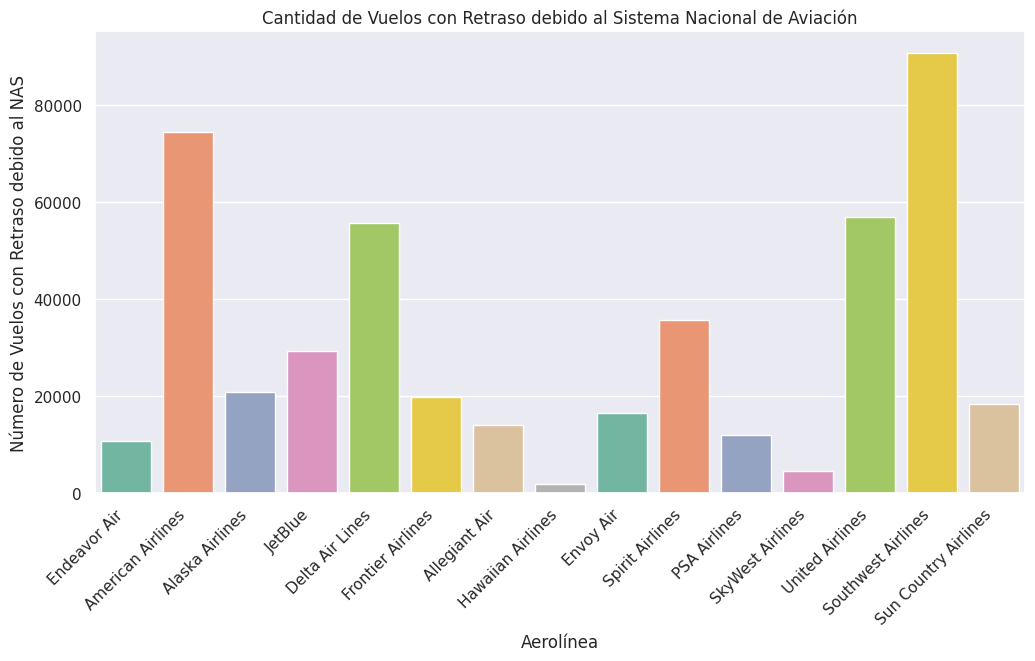

In [49]:
vuelos_con_retraso_por_nas = df[df['DELAY_DUE_NAS'] > 1]

plt.figure(figsize=(12, 6))
sns.countplot(x='AIRLINE_NAME', data=vuelos_con_retraso_por_nas, palette='Set2')

plt.xlabel('Aerolínea')
plt.ylabel('Número de Vuelos con Retraso debido al NAS')
plt.title('Cantidad de Vuelos con Retraso debido al Sistema Nacional de Aviación')
plt.xticks(rotation=45, ha='right')

plt.show()

In [50]:
vuelos_con_retraso_por_seguridad = df[df['DELAY_DUE_SECURITY'] > 1]
vuelos_con_retraso_por_seguridad = len(vuelos_con_retraso_por_seguridad)

print(f'Cantidad de vuelos con retraso debido a Alerta de Seguridad: {vuelos_con_retraso_por_seguridad}')

Cantidad de vuelos con retraso debido a Alerta de Seguridad: 5563


<ipython-input-51-8897f6e1d6a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AIRLINE_NAME', data=vuelos_con_retraso_por_seguridad, palette='Set2')


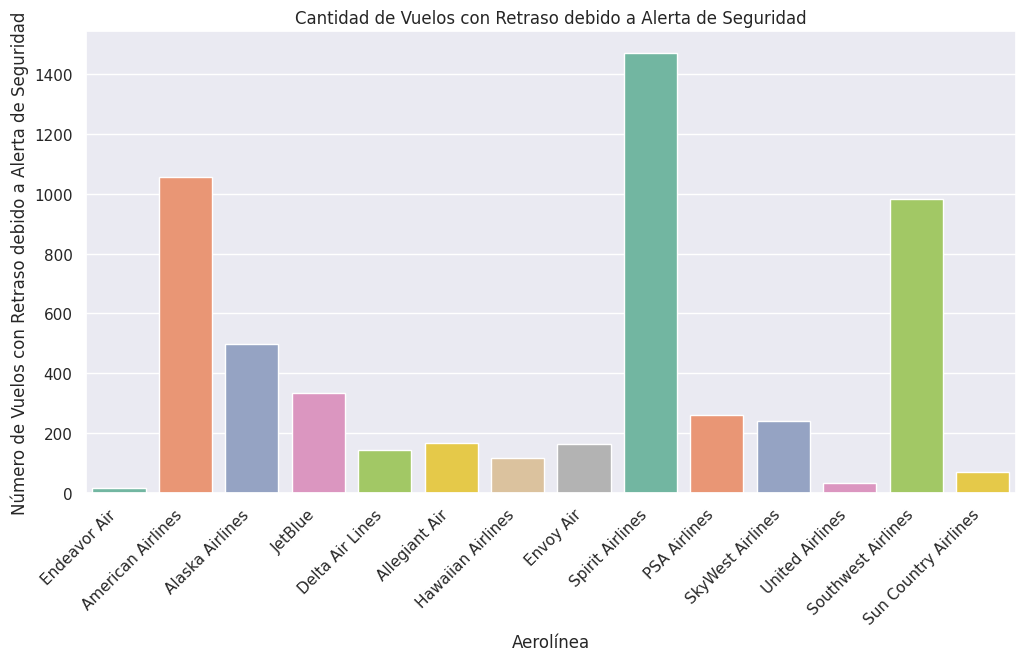

In [51]:
vuelos_con_retraso_por_seguridad = df[df['DELAY_DUE_SECURITY'] > 1]

plt.figure(figsize=(12, 6))
sns.countplot(x='AIRLINE_NAME', data=vuelos_con_retraso_por_seguridad, palette='Set2')

plt.xlabel('Aerolínea')
plt.ylabel('Número de Vuelos con Retraso debido a Alerta de Seguridad')
plt.title('Cantidad de Vuelos con Retraso debido a Alerta de Seguridad')
plt.xticks(rotation=45, ha='right')

plt.show()

In [52]:
vuelos_con_retraso_por_avion = df[df['DELAY_DUE_LATE_AIRCRAFT'] > 1]
vuelos_con_retraso_por_avion = len(vuelos_con_retraso_por_avion)

print(f'Cantidad de vuelos con retraso debido a la llegada tardía de la aeronave.: {vuelos_con_retraso_por_avion}')

Cantidad de vuelos con retraso debido a la llegada tardía de la aeronave.: 526220


<ipython-input-53-81b687b28b12>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AIRLINE_NAME', data=vuelos_con_retraso_por_avion, palette='Set2')


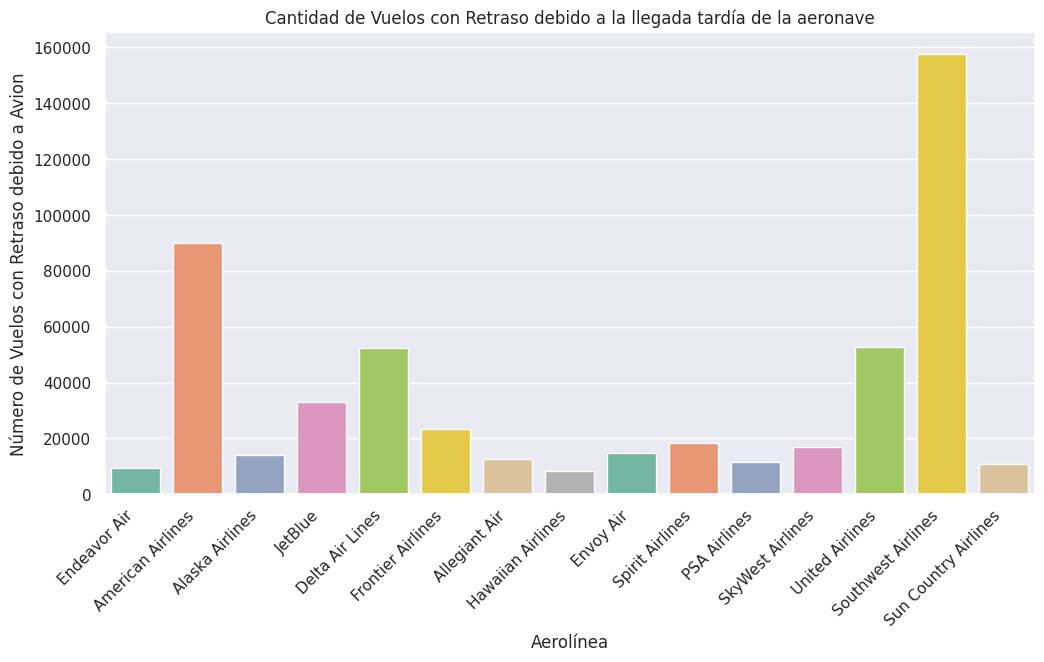

In [53]:
vuelos_con_retraso_por_avion = df[df['DELAY_DUE_LATE_AIRCRAFT'] > 1]

plt.figure(figsize=(12, 6))
sns.countplot(x='AIRLINE_NAME', data=vuelos_con_retraso_por_avion, palette='Set2')

plt.xlabel('Aerolínea')
plt.ylabel('Número de Vuelos con Retraso debido a Avion')
plt.title('Cantidad de Vuelos con Retraso debido a la llegada tardía de la aeronave')
plt.xticks(rotation=45, ha='right')

plt.show()

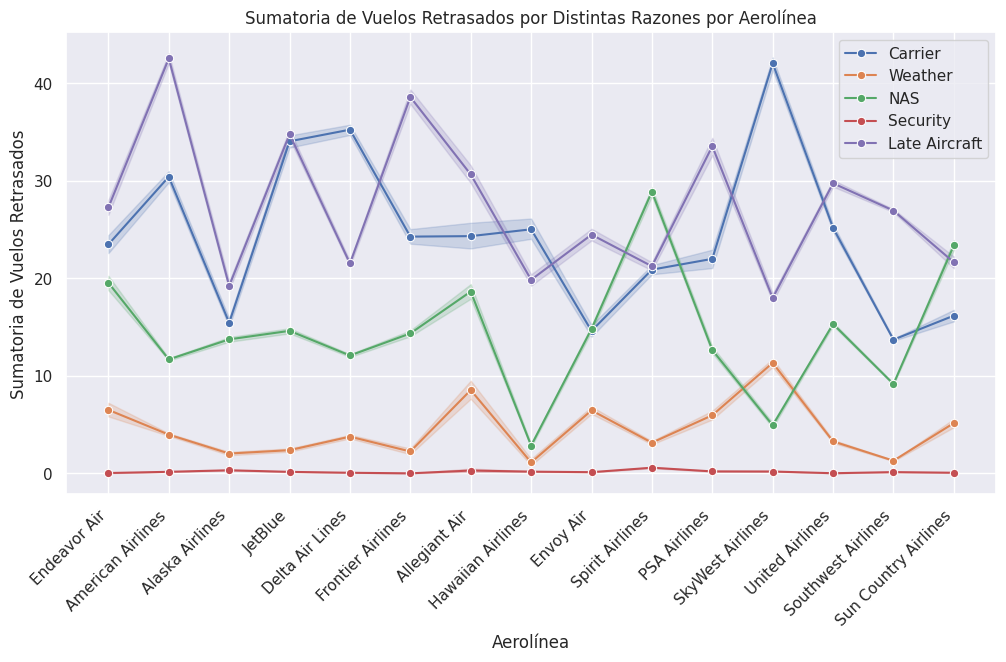

In [54]:
vuelos_con_retraso = df[(df['DELAY_DUE_CARRIER'] > 1) | (df['DELAY_DUE_WEATHER'] > 1) |
                        (df['DELAY_DUE_NAS'] > 1) | (df['DELAY_DUE_SECURITY'] > 1) |
                        (df['DELAY_DUE_LATE_AIRCRAFT'] > 1)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='AIRLINE_NAME', y='DELAY_DUE_CARRIER', data=vuelos_con_retraso, label='Carrier', marker='o')
sns.lineplot(x='AIRLINE_NAME', y='DELAY_DUE_WEATHER', data=vuelos_con_retraso, label='Weather', marker='o')
sns.lineplot(x='AIRLINE_NAME', y='DELAY_DUE_NAS', data=vuelos_con_retraso, label='NAS', marker='o')
sns.lineplot(x='AIRLINE_NAME', y='DELAY_DUE_SECURITY', data=vuelos_con_retraso, label='Security', marker='o')
sns.lineplot(x='AIRLINE_NAME', y='DELAY_DUE_LATE_AIRCRAFT', data=vuelos_con_retraso, label='Late Aircraft', marker='o')

plt.xlabel('Aerolínea')
plt.ylabel('Sumatoria de Vuelos Retrasados')
plt.title('Sumatoria de Vuelos Retrasados por Distintas Razones por Aerolínea')

plt.xticks(rotation=45, ha='right')

plt.legend()
plt.show()

###Se desea saber si la cantidad de vuelos retrasados para American Airline iguala al promedio de vuelos totales

In [55]:
from scipy import stats

american_airlines_data = df[df['AIRLINE_NAME'] == 'American Airlines']

promedio_total = df['DEP_DELAY'].mean()

t_stat, p_valor = stats.ttest_1samp(american_airlines_data['DEP_DELAY'], popmean=promedio_total)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_valor}')

nivel_de_significacion = 0.05
if p_valor < nivel_de_significacion:
    print('Se rechaza la hipótesis nula: El tiempo de delay para American Airlines supera el promedio de todas las aerolíneas.')
else:
    print('No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que el tiempo de delay para American Airlines supera el promedio de todas las aerolíneas.')

Estadístico t: 56.54518308310733
Valor p: 0.0
Se rechaza la hipótesis nula: El tiempo de delay para American Airlines supera el promedio de todas las aerolíneas.


###Se desea saber si la cantidad de vuelos retrasados para Delta Air Lines iguala al promedio de vuelos totales

In [56]:
delta_airlines_data = df[df['AIRLINE_NAME'] == 'Delta Air Lines']

promedio_total = df['DEP_DELAY'].mean()

t_stat, p_valor = stats.ttest_1samp(delta_airlines_data['DEP_DELAY'], popmean=promedio_total)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_valor}')

nivel_de_significacion = 0.05
if p_valor < nivel_de_significacion:
    print('Se rechaza la hipótesis nula: El tiempo de delay para Delta Air Lines no supera el promedio de todas las aerolíneas.')
else:
    print('No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que el tiempo de delay para Delta Air Lines es igual al promedio de todas las aerolíneas.')

Estadístico t: -17.7441332866747
Valor p: 1.9873487256547e-70
Se rechaza la hipótesis nula: El tiempo de delay para Delta Air Lines no supera el promedio de todas las aerolíneas.


###Se desea saber si la cantidad de vuelos retrasados para Southwest Airlines iguala al promedio de vuelos totales

In [57]:
southwest_airlines_data = df[df['AIRLINE_NAME'] == 'Southwest Airlines']

promedio_total = df['DEP_DELAY'].mean()

t_stat, p_valor = stats.ttest_1samp(southwest_airlines_data['DEP_DELAY'], popmean=promedio_total)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_valor}')

nivel_de_significacion = 0.05
if p_valor < nivel_de_significacion:
    print('Se rechaza la hipótesis nula: El tiempo de delay para Southwest Airlines no supera el promedio de todas las aerolíneas.')
else:
    print('No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que el tiempo de delay para Southwest Airlines es igual al promedio de todas las aerolíneas.')

Estadístico t: -35.54865705052919
Valor p: 1.3320585622038968e-276
Se rechaza la hipótesis nula: El tiempo de delay para Southwest Airlines no supera el promedio de todas las aerolíneas.


###Se desea saber si la cantidad de vuelos retrasados para JetBlue iguala al promedio de vuelos totales

In [58]:
jetBlue_airlines_data = df[df['AIRLINE_NAME'] == 'JetBlue']

promedio_total = df['DEP_DELAY'].mean()

t_stat, p_valor = stats.ttest_1samp(jetBlue_airlines_data['DEP_DELAY'], popmean=promedio_total)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_valor}')

nivel_de_significacion = 0.05
if p_valor < nivel_de_significacion:
    print('Se rechaza la hipótesis nula: El tiempo de delay para JetBlue supera el promedio de todas las aerolíneas.')
else:
    print('No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que el tiempo de delay para JetBlue es igual al promedio de todas las aerolíneas.')

Estadístico t: 65.54774988564932
Valor p: 0.0
Se rechaza la hipótesis nula: El tiempo de delay para JetBlue supera el promedio de todas las aerolíneas.


###Se desea saber si la cantidad de vuelos retrasados para Spirit Airlines iguala al promedio de vuelos totales

In [59]:
spirit_airlines_data = df[df['AIRLINE_NAME'] == 'Spirit Airlines']

promedio_total = df['DEP_DELAY'].mean()

t_stat, p_valor = stats.ttest_1samp(spirit_airlines_data['DEP_DELAY'], popmean=promedio_total)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_valor}')

nivel_de_significacion = 0.05
if p_valor < nivel_de_significacion:
    print('Se rechaza la hipótesis nula: El tiempo de delay para Spirit Airlines supera el promedio de todas las aerolíneas.')
else:
    print('No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que el tiempo de delay para Spirit Airlines es igual al promedio de todas las aerolíneas.')

Estadístico t: 55.80626654568693
Valor p: 0.0
Se rechaza la hipótesis nula: El tiempo de delay para Spirit Airlines supera el promedio de todas las aerolíneas.
